# 버전 확인

In [42]:
import numpy

numpy.__version__

'1.26.4'

In [43]:
import pandas

pandas.__version__

'1.4.4'

In [44]:
import matplotlib

matplotlib.__version__

'3.5.2'

In [45]:
import folium

folium.__version__

'0.16.0'

In [46]:
import sklearn

sklearn.__version__

'1.0.2'

In [ ]:
import geopandas

geopandas.__version__

In [ ]:
import seaborn

seaborn.__version__

# 패키지 설치

In [112]:
# pip install geopandas


     ---------------------------------------- 1.1/1.1 MB 14.1 MB/s eta 0:00:00
     ---------------------------------------- 6.1/6.1 MB 3.0 MB/s eta 0:00:00
     ---------------------------------------- 1.4/1.4 MB 2.3 MB/s eta 0:00:00
     ---------------------------------------- 22.9/22.9 MB 2.3 MB/s eta 0:00:00


# 패키지 로딩

In [218]:
import numpy as np
import pandas as pd
from pandas.tseries.offsets import DateOffset

import glob
import re

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.dates as mdates
import seaborn as sns

import folium

import warnings

warnings.filterwarnings("ignore")

plt.rcParams['font.family'] ='Malgun Gothic'

# 데이터 로딩
- 1월 27일 ~ 5월 17일, 111일치

## 2023년 따릉이 사용량 

In [49]:
df_2023 = pd.DataFrame()

for i in range(1, 6):

    all_files = glob.glob(f"./data/일일 따릉이 사용내역/23년/{i}월/*.csv")

    for file in all_files:
        
        try:
            temp = pd.read_csv(file, encoding="utf-8-sig")
            
        except:
            temp = pd.read_csv(file, encoding="cp949")

        try:
            temp = temp[["기준_날짜", "집계 기준", "기준_시간대", "정류소 ID"]]
            temp = temp[temp["집계 기준"] == "도착시간"]
            temp = temp.drop("집계 기준", axis = 1)
            
        except:
            temp = temp[["기준_날짜", "기준_시간대", "시작_대여소_ID"]]
            
        finally:
            temp["기준_날짜"] = pd.to_datetime(temp["기준_날짜"], format='%Y%m%d')

            df_2023 = pd.concat([df_2023, temp], axis = 0)
            
df_2023.sort_values(["기준_날짜", "기준_시간대"]).reset_index(drop=True, inplace = True)

df_2023

,기준_날짜,기준_시간대,시작_대여소_ID
0,2023-01-29,0,ST-1350
1,2023-01-29,0,ST-2797
2,2023-01-29,0,ST-788
3,2023-01-29,0,ST-908
4,2023-01-29,5,ST-1350
...,...,...,...
373833,2023-05-17,1515,ST-2760
373834,2023-05-17,1730,ST-1199
373835,2023-05-17,1155,ST-2972
373836,2023-05-17,1505,ST-2760


## 2024년 따릉이 사용량
- 2월 4, 5, 6, 18, 19, 20일 데이터 X

In [50]:
df_2024 = pd.DataFrame()

for i in range(1, 6):

    all_files = glob.glob(f"./data/일일 따릉이 사용내역/24년/{i}월/*.csv")

    for file in all_files:
        
        try:
            temp = pd.read_csv(file, encoding="utf-8-sig")
            
        except:
            temp = pd.read_csv(file, encoding="cp949")

        try:
            temp = temp[["기준_날짜", "집계 기준", "기준_시간대", "정류소 ID"]]
            temp = temp[temp["집계 기준"] == "도착시간"]
            temp = temp.drop("집계 기준", axis = 1)
            
        except:
            temp = temp[["기준_날짜", "기준_시간대", "시작_대여소_ID"]]
            
        finally:
            temp["기준_날짜"] = pd.to_datetime(temp["기준_날짜"], format='%Y%m%d')

            df_2024 = pd.concat([df_2024, temp], axis = 0)
            
df_2024.sort_values(["기준_날짜", "기준_시간대"]).reset_index(drop=True, inplace = True)

df_2024

,기준_날짜,기준_시간대,시작_대여소_ID
0,2024-01-31,0,ST-1013
1,2024-01-31,0,ST-1014
2,2024-01-31,0,ST-1015
3,2024-01-31,0,ST-1046
4,2024-01-31,0,ST-1046
...,...,...,...
366781,2024-05-17,2355,ST-99
366782,2024-05-17,2355,ST-99
366783,2024-05-17,2355,ST-99
366784,2024-05-17,2355,ST-994


## 버스 이용 데이터

In [51]:
bus_2023 = pd.DataFrame()

for i in range(1, 6):
    temp = pd.read_csv(f"./data/버스 이용 데이터/23년/BUS_STATION_BOARDING_MONTH_20230{i}.csv", encoding="cp949")

    bus_2023 = pd.concat([bus_2023, temp], axis = 0)

In [52]:
bus_2024 = pd.DataFrame()

for i in range(1, 6):
    temp = pd.read_csv(f"./data/버스 이용 데이터/24년/BUS_STATION_BOARDING_MONTH_20240{i}.csv", encoding="cp949")

    bus_2024 = pd.concat([bus_2024, temp], axis = 0)

## 지하철 이용 데이터

In [53]:
subway_2023 = pd.DataFrame()

all_files = glob.glob("./data/지하철 이용 데이터/23년/*.csv")
    
for file in all_files:
    
    temp = pd.read_csv(file, encoding="utf-8-sig")
    temp = temp.reset_index()
    temp = temp.drop("등록일자", axis = 1)
    temp.columns = ['사용일자', '노선명', '역명', '승차총승객수', '하차총승객수', '등록일자']
    
    subway_2023 = pd.concat([subway_2023, temp], axis = 0)

In [54]:
subway_2024 = pd.DataFrame()

all_files = glob.glob("./data/지하철 이용 데이터/24년/*.csv")
    
for file in all_files:
    
    try:
        temp = pd.read_csv(file, encoding="utf-8-sig")
        temp = temp.reset_index()
        temp = temp.drop("등록일자", axis = 1)
        temp.columns = ['사용일자', '노선명', '역명', '승차총승객수', '하차총승객수', '등록일자']
        
    except:
        temp = pd.read_csv(file, encoding="cp949")
    
    subway_2024 = pd.concat([subway_2024, temp], axis = 0)

## 서울시 따릉이대여소 위치정보

In [81]:
sbike_spot = pd.read_csv("./data/서울시 따릉이대여소 마스터 정보.csv", encoding="cp949")

sbike_spot

,대여소_ID,주소1,주소2,위도,경도
0,ST-999,서울특별시 양천구 목동서로 280,목동아파트 8단지 상가동,0.000000,0.000000
1,ST-998,서울특별시 양천구 목동서로 130,목동아파트 4단지 상가동,0.000000,0.000000
2,ST-997,서울특별시 양천구 목동중앙로 49,목동3단지 시내버스정류장,37.534390,126.869598
3,ST-996,서울특별시 양천구 남부순환로88길5-16,양강중학교앞 교차로,37.524334,126.850548
4,ST-995,서울특별시 양천구 중앙로 153 공중화장실,NaN,37.510597,126.857323
...,...,...,...,...,...
3281,ST-1002,서울특별시 양천구 목동동로 316-6,서울시 도로환경관리센터,37.529900,126.876541
3282,ST-1001,서울특별시 양천구 남부순환로4길20,서서울호수공원,0.000000,0.000000
3283,ST-1000,서울특별시 양천구 신정동 236,서부식자재마트 건너편,37.510380,126.866798
3284,ST-100,서울특별시 광진구 아차산로 262,더샵스타시티 C동 앞,37.536667,127.073593


## 지하철역_GEOM (역사마스터)

In [56]:
subway_location = pd.read_csv("./data/지하철역_GEOM (역사마스터).csv")

subway_location

,외구간_역_수,역한글명칭,호선명칭,환승역X좌표,환승역Y좌표
0,4128,삼성중앙,9호선(연장),127.053282,37.513011
1,4124,사평,9호선,127.015259,37.504206
2,4121,구반포,9호선,126.987332,37.501364
3,4119,흑석(중앙대입구),9호선,126.963708,37.508770
4,4116,샛강,9호선,126.928422,37.517274
...,...,...,...,...,...
766,4411,관악산(서울대),신림선,126.945064,37.469102
767,4306,신논현,신분당선(연장2),127.025060,37.504598
768,1404,탕정,장항선,127.084850,36.788660
769,4304,신사,신분당선(연장2),127.020114,37.516334


## 서울시 버스정류소 위치정보

In [57]:
bus_location = pd.read_excel("./data/서울시버스정류소위치정보(20240507).xlsx")

bus_location

,NODE_ID,ARS_ID,정류소명,X좌표,Y좌표,정류소타입
0,100000001,1001,종로2가사거리,126.987752,37.569806,중앙차로
1,100000002,1002,창경궁.서울대학교병원,126.996521,37.579433,중앙차로
2,100000003,1003,명륜3가.성대입구,126.998251,37.582580,중앙차로
3,100000004,1004,종로2가.삼일교,126.987613,37.568579,중앙차로
4,100000005,1005,혜화동로터리.여운형활동터,127.001744,37.586243,중앙차로
...,...,...,...,...,...,...
11256,124000334,25995,우성아파트,127.139339,37.550386,일반차로
11257,124000333,25996,우성아파트,127.140046,37.550643,일반차로
11258,124000332,25997,조일약국,127.123596,37.533630,일반차로
11259,124000331,25998,성내시장,127.125497,37.536155,일반차로


## 2023년 4월 주민등록인구

In [255]:
ppl_2023 = pd.read_csv("./data/인구 데이터/2023년_4월_주민등록인구.csv", encoding="cp949")

ppl_2023

,행정구역(시군구)별,연령별,총인구수 (명),남자인구수 (명),여자인구수 (명)
0,서울특별시,계,9422710,4563512,4859198
1,서울특별시,0세,39236,19977,19259
2,서울특별시,1세,43090,22212,20878
3,서울특별시,2세,43881,22424,21457
4,서울특별시,3세,46197,23982,22215
...,...,...,...,...,...
2647,강동구,96세,108,19,89
2648,강동구,97세,53,12,41
2649,강동구,98세,37,4,33
2650,강동구,99세,28,4,24


## 2024년 4월 주민등록인구

In [59]:
ppl_2024= pd.read_csv("./data/인구 데이터/2024년_4월_주민등록인구.csv", encoding="cp949")

ppl_2024

,행정구역(시군구)별,연령별,총인구수 (명),남자인구수 (명),여자인구수 (명)
0,서울특별시,계,9378269,4532115,4846154
1,서울특별시,0세,37255,19191,18064
2,서울특별시,1세,39761,20217,19544
3,서울특별시,2세,42137,21770,20367
4,서울특별시,3세,43140,22008,21132
...,...,...,...,...,...
2647,강동구,96세,92,16,76
2648,강동구,97세,81,11,70
2649,강동구,98세,42,7,35
2650,강동구,99세,23,2,21


# 데이터 전처리

## 2023년 따릉이 사용량

### 일별 사용량

In [60]:
daily_2023 = df_2023.groupby("기준_날짜")[["시작_대여소_ID"]].count()
daily_2023 = daily_2023.reset_index()
daily_2023 = daily_2023.rename(columns={"시작_대여소_ID":"2023년"})

In [61]:
daily_2023_plot = daily_2023.copy()
daily_2023_plot["기준_날짜"] = daily_2023_plot["기준_날짜"].apply(lambda x: x.replace(year = x.year + 1))

### 월별 사용량
- 2월 4, 5, 6, 18, 19, 20일 데이터 제거

In [62]:
daily_2023["월"] = daily_2023["기준_날짜"].dt.month.astype(str) + "월"

monthly_2023 = daily_2023.copy()
monthly_2023 = monthly_2023.drop([8, 9, 10, 22, 23, 24])

monthly_2023 = monthly_2023.groupby("월")[["2023년"]].sum()

## 2024년 따릉이 사용량

### 일별 사용량

In [63]:
daily_2024 = df_2024.groupby("기준_날짜")[["시작_대여소_ID"]].count()
daily_2024 = daily_2024.reset_index()
daily_2024 = daily_2024.rename(columns={"시작_대여소_ID":"2024년"})

### 월별 사용량

In [64]:
daily_2024["월"] = daily_2024["기준_날짜"].dt.month.astype(str) + "월"

monthly_2024 = daily_2024.groupby("월")[["2024년"]].sum()

## 2023 - 2024 따릉이 사용량 결합
- 2023: 24548453
- 2024: 23457496
- 1090957건 더 적음

In [65]:
sbike_monthly_total = pd.concat([monthly_2023, monthly_2024], axis = 1)
sbike_monthly_total["증감량"] = sbike_monthly_total["2024년"] - sbike_monthly_total["2023년"]

sbike_monthly_total["증감율"] = (sbike_monthly_total["2024년"] - sbike_monthly_total["2023년"])/sbike_monthly_total["2023년"] * 100

In [66]:
sbike_monthly_total

,2023년,2024년,증감량,증감율
월,,,,
1월,508445,721025,212580,41.809832
2월,3603695,3381011,-222684,-6.179324
3월,7463714,6082615,-1381099,-18.504179
4월,7769469,8739678,970209,12.487456
5월,5203130,4533167,-669963,-12.876153


In [67]:
temp = pd.DataFrame(sbike_monthly_total.sum()).T
temp.index = ["합계"]
temp["증감율"] = (temp["2024년"] - temp["2023년"])/temp["2023년"] * 100

temp
# temp.to_csv("1월 ~ 5월 따릉이 이용 통계.csv", encoding="utf-8-sig")

,2023년,2024년,증감량,증감율
합계,24548453.0,23457496.0,-1090957.0,-4.444097


## 서울시 따릉이대여소 위치정보

### 서울 -> 서울특별시

In [82]:
sbike_spot['주소1'] = sbike_spot['주소1'].str.replace('서울 ', '서울특별시 ')

### 도로명 주소 구 단위 주소 전처리

In [83]:
sbike_spot["주소1"].isna().sum()

0

In [84]:
pattern = r"서울특별시\s(\w+구)"

sbike_spot['주소1'] = sbike_spot['주소1'].str.extract(pattern)

In [85]:
sbike_spot["주소1"].isna().sum()

3

In [87]:
na_check = sbike_spot[sbike_spot["주소1"].isna()]["대여소_ID"].values

sbike_spot = pd.read_csv("./data/서울시 따릉이대여소 마스터 정보.csv", encoding="cp949")

for i in na_check:
    display(sbike_spot[sbike_spot["대여소_ID"] == i])

,대여소_ID,주소1,주소2,위도,경도
857,ST-3191,경기도 하남시 학암동 652-1,NaN,37.484833,127.149918


,대여소_ID,주소1,주소2,위도,경도
858,ST-3190,경기도 하남시 학암동 651-1,위례솔,37.486931,127.153648


,대여소_ID,주소1,주소2,위도,경도
1707,ST-2426,경기 성남시 분당구 판교로 289,판교로,37.403549,127.10611


In [88]:
sbike_spot['주소1'] = sbike_spot['주소1'].str.replace('서울 ', '서울특별시 ')
sbike_spot['주소1'] = sbike_spot['주소1'].str.replace('경기 ', '경기도 ')

def extract_region(address):
    if re.search(r'서울특별시\s(\w+구)', address):
        return re.search(r'서울특별시\s(\w+구)', address).group(1)
    
    elif re.search(r'경기도', address):
        return '경기도'
    
    else:
        return address
    
sbike_spot['주소1'] = sbike_spot['주소1'].apply(extract_region)
sbike_spot = sbike_spot.drop("주소2", axis = 1)

### 행정구별 따릉이 대여소 대수 확인

In [89]:
sbike_count = sbike_spot.groupby("주소1")[["대여소_ID"]].count().sort_values("대여소_ID", ascending=False)

## 2023 - 2024 행정구별 사용량
- 2023년 2월 4, 5, 6, 18, 19, 20일 데이터 제거

In [152]:
df_2023_filtered = df_2023[~df_2023["기준_날짜"].isin(["2023-02-04", "2023-02-05", "2023-02-06", "2023-02-18", "2023-02-19", "2023-02-20"])]

In [153]:
sbike_2023_gu = pd.merge(df_2023_filtered, sbike_spot, left_on="시작_대여소_ID", right_on="대여소_ID")

In [135]:
sbike_2024_gu = pd.merge(df_2024, sbike_spot, left_on="시작_대여소_ID", right_on="대여소_ID")

In [154]:
sbike_2023_gu_count = sbike_2023_gu.groupby("주소1")[["대여소_ID"]].count().sort_values("대여소_ID", ascending=False)

In [142]:
sbike_2024_gu_count = sbike_2024_gu.groupby("주소1")[["대여소_ID"]].count().sort_values("대여소_ID", ascending=False)

In [157]:
sbike_total_gu_count = pd.concat([sbike_2023_gu_count, sbike_2024_gu_count], axis = 1)
sbike_total_gu_count.columns = ["2023년", "2024년"]

In [161]:
sbike_total_gu_count["증감량"] = sbike_total_gu_count["2024년"] - sbike_total_gu_count["2023년"]

sbike_total_gu_count["증감율"] = (sbike_total_gu_count["2024년"] - sbike_total_gu_count["2023년"])/sbike_total_gu_count["2023년"] * 100

In [162]:
sbike_total_gu_count

,2023년,2024년,증감량,증감율
주소1,,,,
강서구,2686510,2709792,23282,0.866626
송파구,2339822,2163230,-176592,-7.547241
영등포구,1965419,1997524,32105,1.633494
노원구,1517867,1464637,-53230,-3.506895
양천구,1367295,1372958,5663,0.414175
마포구,1211794,1135629,-76165,-6.285309
광진구,1191513,1127025,-64488,-5.412278
강동구,1066403,1027062,-39341,-3.689131
성동구,966682,924891,-41791,-4.323138


## 지하철 이용 데이터

### 기후동행카드 사용불가 노선 필터링

In [90]:
# 이용불가 역 262개
subway_unavailable = ["가능", "간석", "관악", "광명", "군포", "금정", "녹양", "당정", "덕계", "도원", "도화", "동두천", "동두천중앙", "동암", "동인천", "두정", "망월사", "명학", "배방", "백운", "병점", "보산"," 봉명", "부개", "부천", "부평", "서동탄", "서정리", "석수", "성균관대", "성환", "세류", "세마", "소사", "소요산", "송내", "송탄", "수원", "신창", "쌍용", "아산", "안양", "양주", "역곡", "연천", "오산", "오산대", "온양온천", "의왕", "의정부", "인천", "전곡", "제물포", "주안", "중동", "지행", "직산", "진위", "천안", "청산", "탕정", "평택", "평택지제", "화서", "회룡", "대곡", "대화", "마두", "백석", "삼송", "원당", "원흥", "정발산", "주엽", "화정", "경마공원", "고잔", "과천", "금정", "대공원", "대야미", "반월", "범계", "별내별가람", "산본", "상록수", "선바위", "수리산", "신길온천", "안산", "오남", "오이도", "인덕원", "정부과천청사", "정왕", "중앙", "진접", "초지", "평촌", "한대앞", "미사", "하남검단산", "하남시청", "하남풍산", "굴포천", "까치울", "부천시청", "부천종합운동장", "부평구청", "산곡", "삼산체육관", "상동", "석남", "신중동", "춘의", "강매", "곡산", "구리", "국수", "금릉", "금촌", "능곡", "대곡", "덕소", "도농", "도심", "문산", "백마", "신원", "아신", "야당", "양수", "양정", "양평", "오빈", "용문", "운길산", "운정", "운천", "원덕", "월롱", "일산", "임진강", "지평", "탄현", "파주", "팔당", "풍산", "한국항공대", "행신", "가평", "갈매", "강촌", "광운대", "굴봉산", "금곡", "김유정", "남춘천", "대성리", "마석", "백양리", "별내", "사릉", "상천", "천마산", "청평", "춘천", "퇴계원", "평내호평", "검암", "계양", "공항화물청사", "영종", "운서", "인천공항1터미널", "인천공항2터미널", "청라국제도시", "곡산", "능곡", "달마", "대곡", "백마", "부천종합운동장", "선부", "소사", "소새울", "시우", "시흥능곡", "시흥대야", "시흥시청", "신천", "신현", "원시", "원종", "일산", "초지", "풍산", "가천대", "고색", "고잔", "구성", "기흥", "남동인더스파크", "달월", "망포", "매교", "매탄권선", "미금", "보정", "사리", "상갈", "서현", "소래포구", "송도", "수내", "수원", "수원시청", "숭의", "신갈", "신길온천", "신포", "안산", "야목", "야탑", "어천", "연수", "영통", "오리", "오목천", "오이도", "원인재", "월곶", "이매", "인천", "인천논현", "인하대", "정왕", "정자", "죽전", "중앙", "청명", "청명", "초지", "태평", "한대앞", "호구포", "강남", "광교", "광교중앙", "논현", "동천", "미금", "상현", "성복", "수지구청", "신논현", "신사", "양재", "양재시민의숲", "정자", "청계산입구", "판교"]

In [91]:
# 1월 27일 ~ 5월 17일
subway_2023 = subway_2023[(subway_2023["사용일자"] >= 20230127) & (subway_2023["사용일자"] <= 20230517)].sort_values("사용일자").reset_index(drop=True)

subway_2024 = subway_2024[(subway_2024["사용일자"] >= 20240127) & (subway_2024["사용일자"] <= 20240517)].sort_values("사용일자").reset_index(drop=True)

In [92]:
subway_2023 = subway_2023[~subway_2023["역명"].isin(subway_unavailable)]
subway_2024 = subway_2024[~subway_2024["역명"].isin(subway_unavailable)]

### 월별, 일별 지하철 이용 수 집계

In [93]:
subway_2023["사용일자"] = pd.to_datetime(subway_2023["사용일자"], format="%Y%m%d")
subway_2023["월"] = subway_2023["사용일자"].dt.month

subway_2024["사용일자"] = pd.to_datetime(subway_2024["사용일자"], format="%Y%m%d")
subway_2024["월"] = subway_2024["사용일자"].dt.month

In [94]:
subway_2023_daily = subway_2023.groupby("사용일자")[["승차총승객수"]].sum()

subway_2023_daily_plot = subway_2023_daily.copy()
subway_2023_daily_plot.index = subway_2023_daily_plot.index + DateOffset(years=1)

In [95]:
subway_2023_monthly = subway_2023.groupby("월")[["승차총승객수"]].sum()

In [96]:
subway_2024_daily = subway_2024.groupby("사용일자")[["승차총승객수"]].sum()

In [97]:
subway_2024_monthly = subway_2024.groupby("월")[["승차총승객수"]].sum()

### 2023년 - 2024년 이용 수 결합

In [98]:
subway_monthly_total = pd.concat([subway_2023_monthly, subway_2024_monthly], axis = 1)
subway_monthly_total.columns = ["2023년", "2024년"]

subway_monthly_total["증감량"] = subway_monthly_total["2024년"] - subway_monthly_total["2023년"]

subway_monthly_total["증감율"] = (subway_monthly_total["2024년"] - subway_monthly_total["2023년"])/subway_monthly_total["2023년"] * 100

In [99]:
temp = pd.DataFrame(subway_monthly_total.sum()).T
temp.index = ["합계"]
temp["증감율"] = (temp["2024년"] - temp["2023년"])/temp["2023년"] * 100

temp
# temp.to_csv("1월 ~ 5월 지하철 이용 통계.csv", encoding="utf-8-sig")

,2023년,2024년,증감량,증감율
합계,581675165.0,593765801.0,12090636.0,2.078589


## 버스 이용 데이터

### 기후동행카드 사용불가 노선 필터링

In [100]:
# 이용불가 노선 13개
bus_unavailable = ["6633", "9401", "9401-01", "9404", "9408", "9409", "9701", "9707", "9711", "9714", "서울01", "서울03", "서울06"]

In [101]:
# 1월 27일 ~ 5월 17일
bus_2023 = bus_2023[(bus_2023["사용일자"] >= 20230127) & (bus_2023["사용일자"] <= 20230517)].sort_values("사용일자").reset_index(drop=True)

bus_2024 = bus_2024[(bus_2024["사용일자"] >= 20240127) & (bus_2024["사용일자"] <= 20240517)].sort_values("사용일자").reset_index(drop=True)

In [102]:
bus_2023 = bus_2023[~bus_2023["노선번호"].isin(bus_unavailable)]
bus_2024 = bus_2024[~bus_2024["노선번호"].isin(bus_unavailable)]

### 월별, 일별 버스 이용 수 집계

In [103]:
bus_2023["사용일자"] = pd.to_datetime(bus_2023["사용일자"], format="%Y%m%d")
bus_2023["월"] = bus_2023["사용일자"].dt.month

bus_2024["사용일자"] = pd.to_datetime(bus_2024["사용일자"], format="%Y%m%d")
bus_2024["월"] = bus_2024["사용일자"].dt.month

In [104]:
bus_2023_daily = bus_2023.groupby("사용일자")[["승차총승객수"]].sum()

bus_2023_daily_plot = bus_2023_daily.copy()
bus_2023_daily_plot.index = bus_2023_daily_plot.index + DateOffset(years=1)

In [105]:
bus_2023_monthly = bus_2023.groupby("월")[["승차총승객수"]].sum()

In [106]:
bus_2024_daily = bus_2024.groupby("사용일자")[["승차총승객수"]].sum()

In [107]:
bus_2024_monthly = bus_2024.groupby("월")[["승차총승객수"]].sum()

### 2023년 - 2024년 이용 수 결합

In [108]:
bus_monthly_total = pd.concat([bus_2023_monthly, bus_2024_monthly], axis = 1)
bus_monthly_total.columns = ["2023년", "2024년"]

bus_monthly_total["증감량"] = bus_monthly_total["2024년"] - bus_monthly_total["2023년"]

bus_monthly_total["증감율"] = (bus_monthly_total["2024년"] - bus_monthly_total["2023년"])/bus_monthly_total["2023년"] * 100

In [109]:
temp = pd.DataFrame(bus_monthly_total.sum()).T
temp.index = ["합계"]
temp["증감율"] = (temp["2024년"] - temp["2023년"])/temp["2023년"] * 100

temp
# temp.to_csv("1월 ~ 5월 버스 이용 통계.csv", encoding="utf-8-sig")

,2023년,2024년,증감량,증감율
합계,492311553.0,492507355.0,195802.0,0.039772


## 지하철역_GEOM(역사마스터)

### 서울시 행정구 라벨링
- 코드 실행시간이 길어서 미리 전처리한 데이터로 진행

In [113]:
import geopandas as gpd
from shapely.geometry import Point

def classify_district(latitude, longitude):
    seoul_districts = gpd.read_file("./data/서울_자치구_경계_2017.geojson")
    
    point = Point(longitude, latitude)
    
    for _, district in seoul_districts.iterrows():
        if district.geometry.contains(point):
            return district['SIG_KOR_NM']
    
    return "서울시 외부"

In [ ]:
# subway_location['행정구'] = subway_location.apply(lambda row: classify_district(row['환승역Y좌표'], row['환승역X좌표']), axis=1)

In [ ]:
# subway_location.to_csv("./data/지하철역_GEOM (역사마스터)_전처리.csv", encoding="utf-8-sig", index=False)

In [114]:
subway_location = pd.read_csv("./data/지하철역_GEOM (역사마스터)_전처리.csv")

### 기후동행카드 사용 가능 지역 필터링

In [115]:
# 서울 내부 필터링
subway_location = subway_location[subway_location["행정구"] != "서울시 외부"]

# 기후동행카드 사용 불가 지역 필터링
subway_location = subway_location[~subway_location["역한글명칭"].isin(subway_unavailable)]

### 행정구별 지하철역 개수

In [116]:
subway_count = subway_location.groupby("행정구")[["역한글명칭"]].count().sort_values("역한글명칭", ascending=False)

## 서울시 버스정류소 위치정보

### 서울시 행정구 라벨링
- 코드 실행시간이 길어서 미리 전처리한 데이터로 진행

In [ ]:
# bus_location['행정구'] = bus_location.apply(lambda row: classify_district(row['Y좌표'], row['X좌표']), axis=1)

In [ ]:
# bus_location.to_csv("./data/서울시 버스정류소 위치정보_전처리.csv", encoding="utf-8-sig", index=False)

In [167]:
bus_location = pd.read_csv("./data/서울시 버스정류소 위치정보_전처리.csv")

### 기후동행카드 사용 가능 지역 필터링

In [168]:
# 서울 내부 필터링
bus_location = bus_location[bus_location["행정구"] != "서울시 외부"]

bus_location

,NODE_ID,ARS_ID,정류소명,X좌표,Y좌표,정류소타입,행정구
0,100000001,1001,종로2가사거리,126.987752,37.569806,중앙차로,종로구
1,100000002,1002,창경궁.서울대학교병원,126.996521,37.579433,중앙차로,종로구
2,100000003,1003,명륜3가.성대입구,126.998251,37.582580,중앙차로,종로구
3,100000004,1004,종로2가.삼일교,126.987613,37.568579,중앙차로,종로구
4,100000005,1005,혜화동로터리.여운형활동터,127.001744,37.586243,중앙차로,종로구
...,...,...,...,...,...,...,...
11256,124000334,25995,우성아파트,127.139338,37.550386,일반차로,강동구
11257,124000333,25996,우성아파트,127.140046,37.550643,일반차로,강동구
11258,124000332,25997,조일약국,127.123596,37.533630,일반차로,강동구
11259,124000331,25998,성내시장,127.125497,37.536155,일반차로,강동구


### 행정구별 버스정류장 개수

In [169]:
bus_count = bus_location.groupby("행정구")[["정류소명"]].count().sort_values("정류소명", ascending=False)

## 2023년 4월 주민등록인구

### 행정구별 총인구수 필터링

In [258]:
ppl_2023 = ppl_2023[ppl_2023["행정구역(시군구)별"] != "서울특별시"].reset_index(drop=True)

ppl_2023_total = ppl_2023[ppl_2023["연령별"] == "계"][["행정구역(시군구)별", "총인구수 (명)"]].reset_index(drop=True)

ppl_2023_total = ppl_2023_total.set_index("행정구역(시군구)별")

### ?

In [121]:
pattern = r"(\d+)"

ppl_2023['연령별'] = ppl_2023['연령별'].str.extract(pattern).astype(int)

In [122]:
temp = ppl_2023[ppl_2023["행정구역(시군구)별"] == "종로구"]
temp = temp.drop("행정구역(시군구)별", axis = 1)

temp_df = pd.DataFrame()

for j in range(10):
    temp2 = temp.iloc[10 * j : 10 * j + 10].sum().to_frame()
    temp_df = pd.concat([temp_df, temp2], axis = 1)
    
temp_df = temp_df.drop("연령별")
temp_df.columns = ["10세 미만", "10대", "20대", "30대", "40대", "50대", "60대", "70대", "80대", "90대"]

In [123]:
temp_df

,10세 미만,10대,20대,30대,40대,50대,60대,70대,80대,90대
총인구수 (명),6165,10094,21999,19313,19705,24043,20536,11461,6608,933
남자인구수 (명),3098,4986,10414,9643,9519,11937,10335,5168,2669,300
여자인구수 (명),3067,5108,11585,9670,10186,12106,10201,6293,3939,633


## 2024년 4월 주민등록인구 

### 행정구별 총인구수 필터링

In [259]:
ppl_2024 = ppl_2024[ppl_2024["행정구역(시군구)별"] != "서울특별시"].reset_index(drop=True)

ppl_2024_total = ppl_2024[ppl_2024["연령별"] == "계"][["행정구역(시군구)별", "총인구수 (명)"]].set_index("행정구역(시군구)별")

In [260]:
ppl_2024_total

,총인구수 (명)
행정구역(시군구)별,
종로구,139432
중구,121607
용산구,207969
성동구,276847
광진구,334790
동대문구,341981
중랑구,381668
성북구,424663
강북구,285880


## 행정구별 데이터 종합

In [273]:
sbike_count

,대여소_ID
주소1,
송파구,249
강서구,224
강남구,193
영등포구,186
노원구,174
서초구,170
마포구,144
강동구,135
구로구,132


In [274]:
gu_total = pd.concat([sbike_total_gu_count, bus_count, subway_count, ppl_2023_total, ppl_2024_total, sbike_count], axis = 1)

gu_total.columns = ['2023년', '2024년', '증감량', '증감율', '정류소 개수', '지하철역 개수', '2023년 총인구수', '2024년 총인구수', "따릉이 대여소 개수"]

gu_total = gu_total.drop("경기도")

gu_total.to_csv("행정구별 데이터.csv", encoding="utf-8-sig")

# 데이터 분석

## 행정구별 지하철 역, 버스정류장 개수 - 따릉이 사용량

### 상관분석

In [ ]:
gu_total = pd.read_csv("행정구별 데이터.csv", index_col="Unnamed: 0")

gu_total["2023년 1인당 따릉이 사용량"] = gu_total["2023년"] / gu_total["2023년 총인구수"]
gu_total["2024년 1인당 따릉이 사용량"] = gu_total["2024년"] / gu_total["2024년 총인구수"]

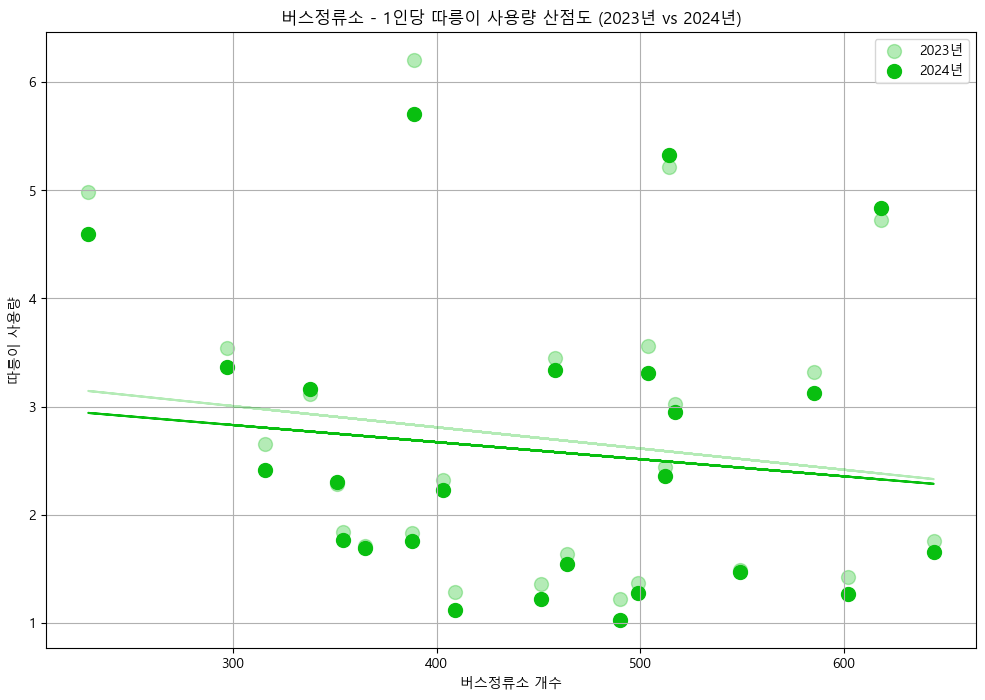

In [285]:
fig, ax = plt.subplots(figsize=(12, 8))

a1, b1 = np.polyfit(gu_total["정류소 개수"], gu_total["2023년 1인당 따릉이 사용량"], 1)
a2, b2 = np.polyfit(gu_total["정류소 개수"], gu_total["2024년 1인당 따릉이 사용량"], 1)

ax.plot(gu_total["정류소 개수"], a1*gu_total["정류소 개수"] + b1, color='#09bf10', alpha=0.3)
ax.plot(gu_total["정류소 개수"], a2*gu_total["정류소 개수"] + b2, color='#09bf10')

ax.scatter(gu_total["정류소 개수"], gu_total["2023년 1인당 따릉이 사용량"], color="#09bf10", alpha=0.3, s=100, label = "2023년")
ax.scatter(gu_total["정류소 개수"], gu_total["2024년 1인당 따릉이 사용량"], color="#09bf10", s=100, label = "2024년")

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

plt.xlabel("버스정류소 개수")
plt.ylabel("따릉이 사용량")
plt.title("버스정류소 - 1인당 따릉이 사용량 산점도 (2023년 vs 2024년)")
plt.grid()
plt.legend()

plt.show()

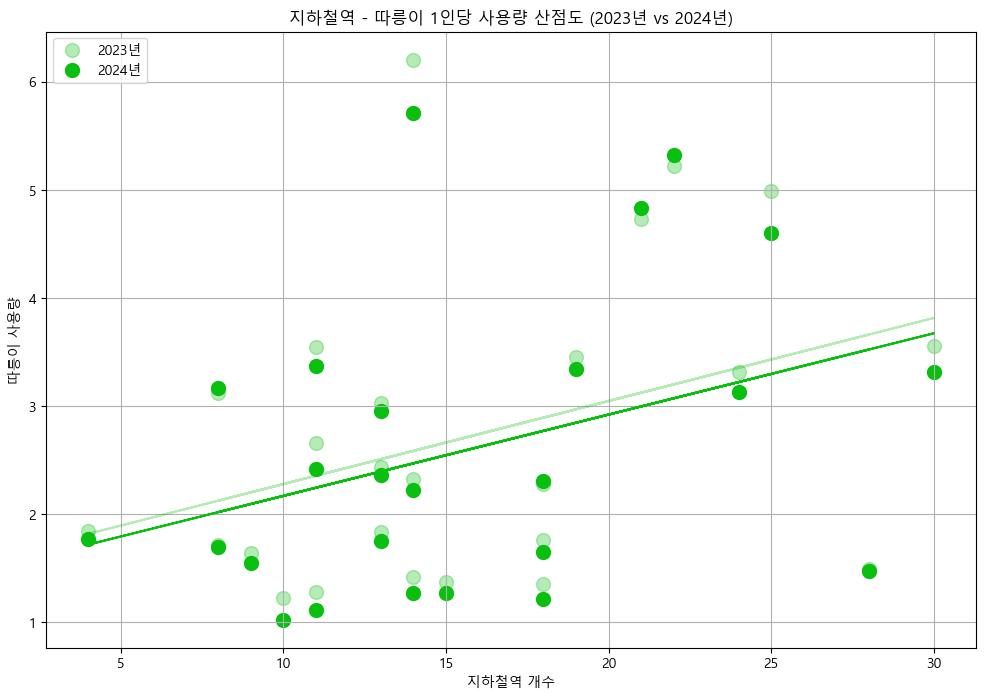

In [286]:
fig, ax = plt.subplots(figsize=(12, 8))

a1, b1 = np.polyfit(gu_total["지하철역 개수"], gu_total["2023년 1인당 따릉이 사용량"], 1)
a2, b2 = np.polyfit(gu_total["지하철역 개수"], gu_total["2024년 1인당 따릉이 사용량"], 1)

ax.plot(gu_total["지하철역 개수"], a1*gu_total["지하철역 개수"] + b1, color='#09bf10', alpha=0.3)
ax.plot(gu_total["지하철역 개수"], a2*gu_total["지하철역 개수"] + b2, color='#09bf10')

ax.scatter(gu_total["지하철역 개수"], gu_total["2023년 1인당 따릉이 사용량"], color="#09bf10", alpha=0.3, s=100, label = "2023년")
ax.scatter(gu_total["지하철역 개수"], gu_total["2024년 1인당 따릉이 사용량"], color="#09bf10", s=100, label = "2024년")

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

plt.xlabel("지하철역 개수")
plt.ylabel("따릉이 사용량")
plt.title("지하철역 - 따릉이 1인당 사용량 산점도 (2023년 vs 2024년)")
plt.grid()
plt.legend(loc="upper left")

plt.show()

In [280]:
# 피어슨 상관계수 확인
corr_2023 = gu_total[['정류소 개수', '지하철역 개수', '2023년 1인당 따릉이 사용량']].corr()
corr_2024 = gu_total[['정류소 개수', '지하철역 개수', '2024년 1인당 따릉이 사용량']].corr()
corr_both = gu_total[['정류소 개수', '지하철역 개수', '2023년 1인당 따릉이 사용량', '2024년 1인당 따릉이 사용량']].corr()

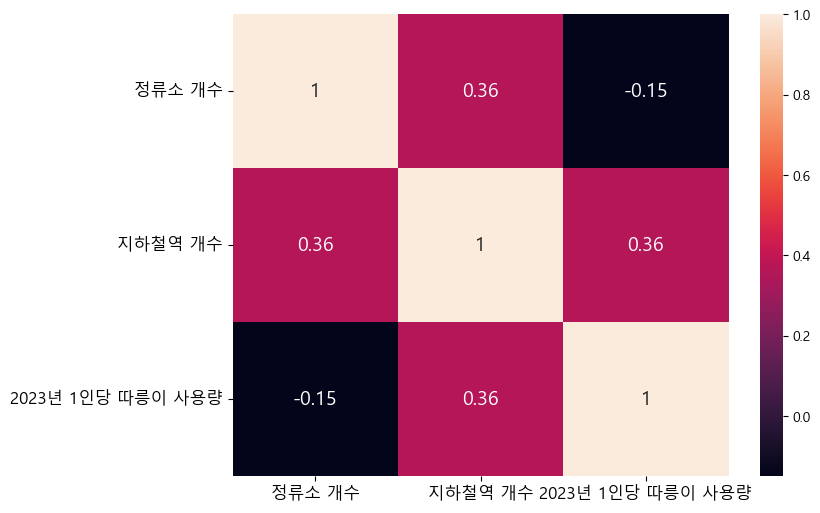

In [281]:
fig, ax = plt.subplots(figsize = (8, 6))

corr_2023 = round(corr_2023, 2)
# mask_feature = np.triu(np.ones_like(corr_2023, dtype=bool))

sns.heatmap(corr_2023, 
#             mask = mask_feature,
            annot=True,
#             cbar=False,
            annot_kws={"size": 14})

ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, ha="right")

plt.show()

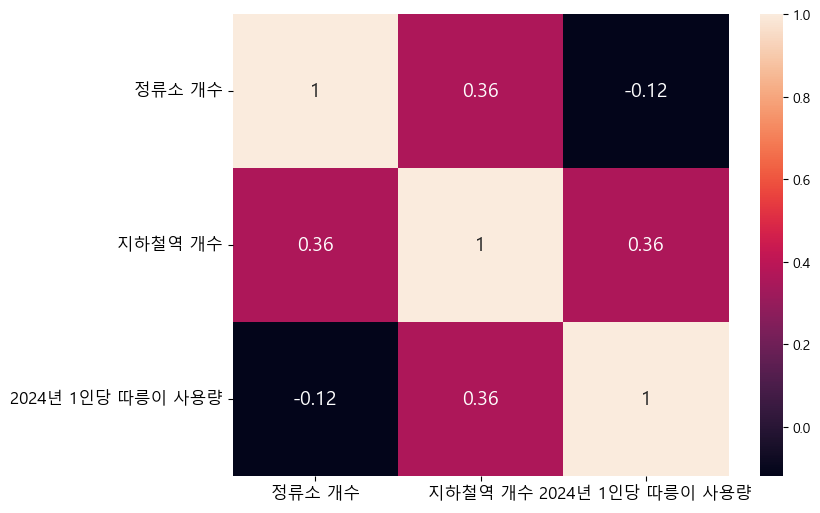

In [282]:
fig, ax = plt.subplots(figsize = (8, 6))

corr_2024 = round(corr_2024, 2)
# mask_feature = np.triu(np.ones_like(corr_2023, dtype=bool))

sns.heatmap(corr_2024, 
#             mask = mask_feature,
            annot=True,
#             cbar=False,
            annot_kws={"size": 14})

ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, ha="right")

plt.show()

### 회귀분석
    - 가설: 대중교통 접근성이 낮을수록(지하철, 버스 정류장 수가 적음) 따릉이를 많이 이용할 것이다
    - 귀무가설: 대중교통 접근성은 따릉이 사용과 관련이 없다
- 독립변수: 행정구별 지하철역 개수 & 버스 정류장수
- 종속변수: 행정구별 1인당 따릉이 사용량
- 지하철역 개수는 음의 상관관계를 보였지만 p-value가 0.05보다 커 통계적으로 유의하지 않음
- 버스 정류장수는 p-value가 0.05보다 작아 통계적으로 유의했지만 양의 상관관계를 보임

In [302]:
from scipy import stats
from statsmodels.formula.api import ols, glm 

temp = gu_total.copy()

temp = temp[['2023년', '2024년', '정류소 개수', '지하철역 개수','2023년 1인당 따릉이 사용량', '2024년 1인당 따릉이 사용량']]

temp.columns = ["y2023", "y2024", "bus", "subway", "per_person_2023", "per_person_2024"]

In [304]:
m1 = ols('per_person_2023~bus', data=temp).fit()

m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        per_person_2023   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                 -0.019
Method:                 Least Squares   F-statistic:                    0.5426
Date:                Wed, 29 May 2024   Prob (F-statistic):              0.469
Time:                        16:01:43   Log-Likelihood:                -42.928
No. Observations:                  25   AIC:                             89.86
Df Residuals:                      23   BIC:                             92.29
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.5941      1.233      2.915      0.008       1.043       6.145
bus           -0.0020      0.003     -0.737      0.469      -0.007       0.004
==============================================================================
Omnibus:                        5.042   Durbin-Watson:                   1.468
Prob(Omnibus):                  0.080   Jarque-Bera (JB):                4.025
Skew:                           0.983   Prob(JB):                        0.134
Kurtosis:                       2.973   Cond. No.                     2.03e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.03e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [306]:
m1 = ols('per_person_2023~subway', data=temp).fit()

m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        per_person_2023   R-squared:                       0.132
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     3.488
Date:                Wed, 29 May 2024   Prob (F-statistic):             0.0746
Time:                        16:01:52   Log-Likelihood:                -41.455
No. Observations:                  25   AIC:                             86.91
Df Residuals:                      23   BIC:                             89.35
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.5078      0.696      2.166      0.041       0.068       2.948
subway         0.0769      0.041      1.868      0.075      -0.008       0.162
==============================================================================
Omnibus:                        5.551   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.650
Skew:                           0.865   Prob(JB):                        0.161
Kurtosis:                       3.715   Cond. No.                         44.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [303]:
m1 = ols('per_person_2023~bus+subway', data=temp).fit()

m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        per_person_2023   R-squared:                       0.225
Model:                            OLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                     3.186
Date:                Wed, 29 May 2024   Prob (F-statistic):             0.0609
Time:                        16:01:35   Log-Likelihood:                -40.041
No. Observations:                  25   AIC:                             86.08
Df Residuals:                      22   BIC:                             89.74
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0195      1.149      2.629      0.015       0.637       5.402
bus           -0.0042      0.003     -1.623      0.119      -0.010       0.001
subway         0.1021      0.043      2.391      0.026       0.014       0.191
==============================================================================
Omnibus:                        7.289   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.026   Jarque-Bera (JB):                5.185
Skew:                           0.989   Prob(JB):                       0.0748
Kurtosis:                       4.032   Cond. No.                     2.07e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.07e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [307]:
m1 = ols('per_person_2024~bus', data=temp).fit()

m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        per_person_2024   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                 -0.027
Method:                 Least Squares   F-statistic:                    0.3647
Date:                Wed, 29 May 2024   Prob (F-statistic):              0.552
Time:                        16:03:21   Log-Likelihood:                -42.471
No. Observations:                  25   AIC:                             88.94
Df Residuals:                      23   BIC:                             91.38
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3032      1.211      2.728      0.012       0.799       5.808
bus           -0.0016      0.003     -0.604      0.552      -0.007       0.004
==============================================================================
Omnibus:                        4.547   Durbin-Watson:                   1.437
Prob(Omnibus):                  0.103   Jarque-Bera (JB):                3.678
Skew:                           0.937   Prob(JB):                        0.159
Kurtosis:                       2.868   Cond. No.                     2.03e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.03e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [308]:
m1 = ols('per_person_2024~subway', data=temp).fit()

m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        per_person_2024   R-squared:                       0.132
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     3.494
Date:                Wed, 29 May 2024   Prob (F-statistic):             0.0744
Time:                        16:03:22   Log-Likelihood:                -40.900
No. Observations:                  25   AIC:                             85.80
Df Residuals:                      23   BIC:                             88.24
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4147      0.681      2.078      0.049       0.007       2.823
subway         0.0752      0.040      1.869      0.074      -0.008       0.158
==============================================================================
Omnibus:                        3.551   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.169   Jarque-Bera (JB):                2.390
Skew:                           0.754   Prob(JB):                        0.303
Kurtosis:                       3.150   Cond. No.                         44.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [309]:
m1 = ols('per_person_2024~bus+subway', data=temp).fit()

m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        per_person_2024   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.136
Method:                 Least Squares   F-statistic:                     2.890
Date:                Wed, 29 May 2024   Prob (F-statistic):             0.0768
Time:                        16:03:23   Log-Likelihood:                -39.752
No. Observations:                  25   AIC:                             85.50
Df Residuals:                      22   BIC:                             89.16
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7539      1.135      2.425      0.024       0.399       5.109
bus           -0.0038      0.003     -1.455      0.160      -0.009       0.002
subway         0.0976      0.042      2.312      0.031       0.010       0.185
==============================================================================
Omnibus:                        5.763   Durbin-Watson:                   1.896
Prob(Omnibus):                  0.056   Jarque-Bera (JB):                3.996
Skew:                           0.941   Prob(JB):                        0.136
Kurtosis:                       3.544   Cond. No.                     2.07e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.07e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 데이터 시각화

## 일별 따릉이 사용량 비교

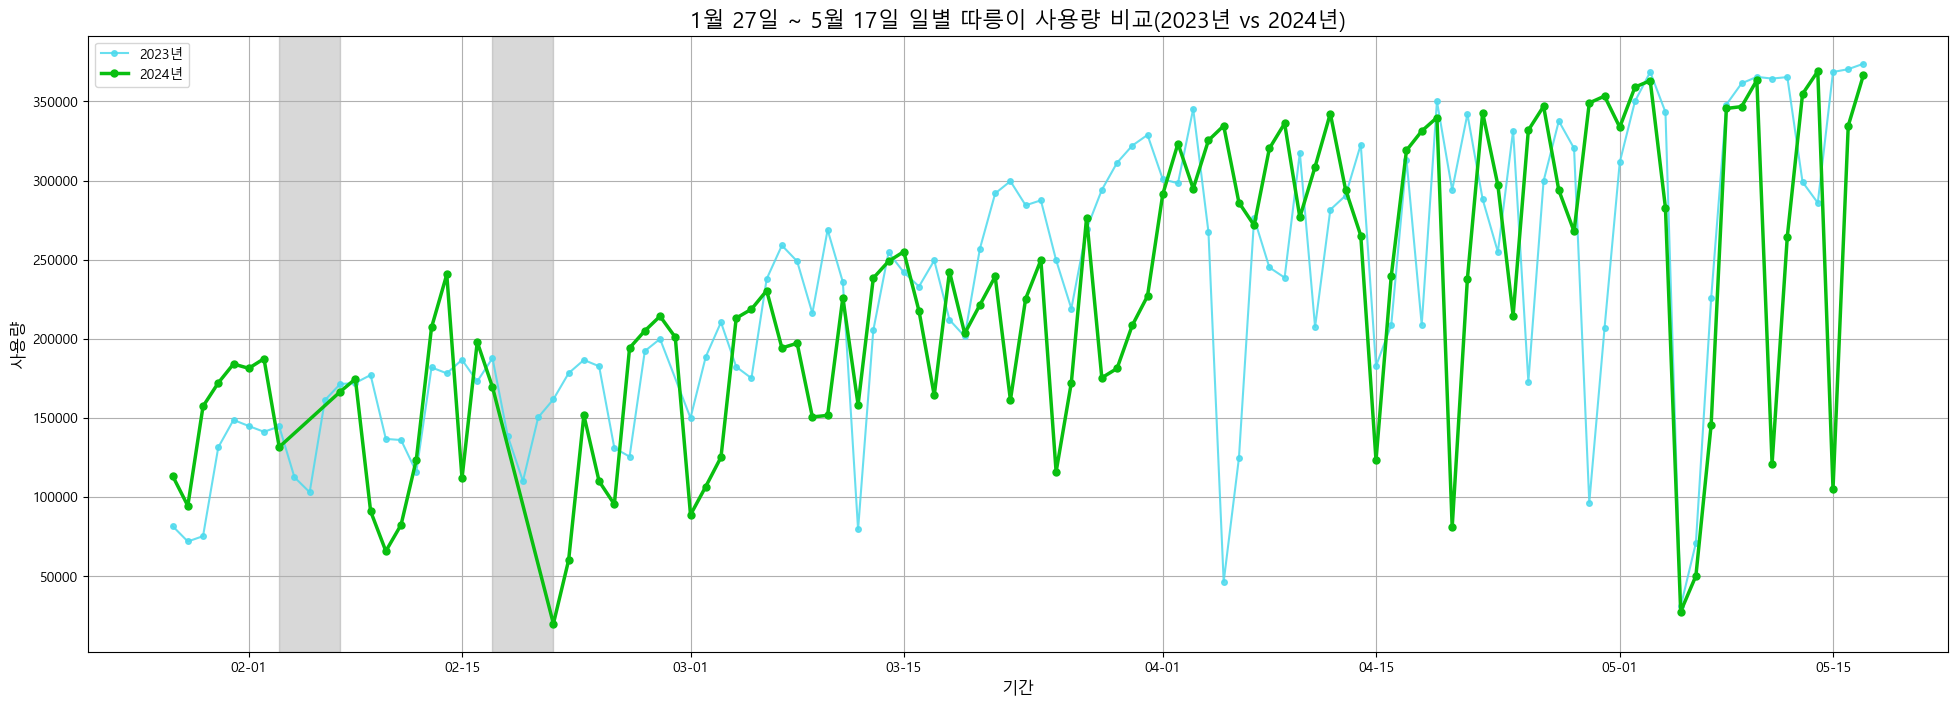

In [36]:
fig, ax = plt.subplots(figsize=(24, 8))

ax.plot(daily_2023_plot["기준_날짜"], daily_2023_plot["2023년"], label = "2023년", marker="o", markersize="4", color="#4EDAED", alpha=0.85)

ax.plot(daily_2024["기준_날짜"], daily_2024["2024년"], label = "2024년", marker="o", markersize="5", linewidth=2.5, color="#09bf10")

date_format = mdates.DateFormatter('%m-%d')
ax.xaxis.set_major_formatter(date_format)

ax.axvspan("2024-02-03", "2024-02-07", alpha=0.3, color='gray')
ax.axvspan("2024-02-17", "2024-02-21", alpha=0.3, color='gray')

plt.xlabel("기간", fontsize = 12)
plt.ylabel("사용량", fontsize = 12)
plt.title("1월 27일 ~ 5월 17일 일별 따릉이 사용량 비교(2023년 vs 2024년)", fontsize = 16)

plt.grid()
plt.legend()

plt.show()

## 월별 따릉이 사용량 비교

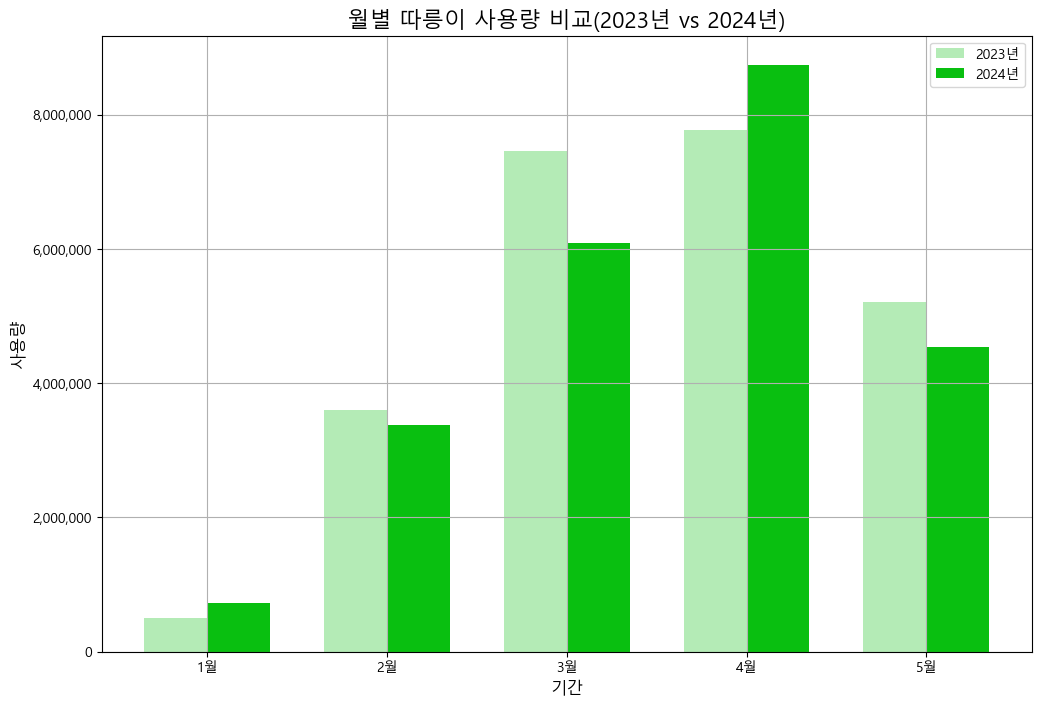

In [31]:
fig, ax = plt.subplots(figsize=(12, 8))

x_labels = ['1월', '2월', '3월', '4월', '5월']
x = np.arange(len(x_labels))

width = 0.35

ax.bar(x - width/2, monthly_2023["2023년"], width, label = "2023년", color="#09bf10", alpha=0.3)
ax.bar(x + width/2, monthly_2024["2024년"], width, label = "2024년", color="#09bf10")

ax.set_xticks(x)
ax.set_xticklabels(x_labels)

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

plt.xlabel("기간", fontsize = 12)
plt.ylabel("사용량", fontsize = 12)
plt.title("월별 따릉이 사용량 비교(2023년 vs 2024년)", fontsize = 16)

plt.grid(axis='y', linestyle='--', alpha=0.7, color="gray")
plt.legend()

plt.show()

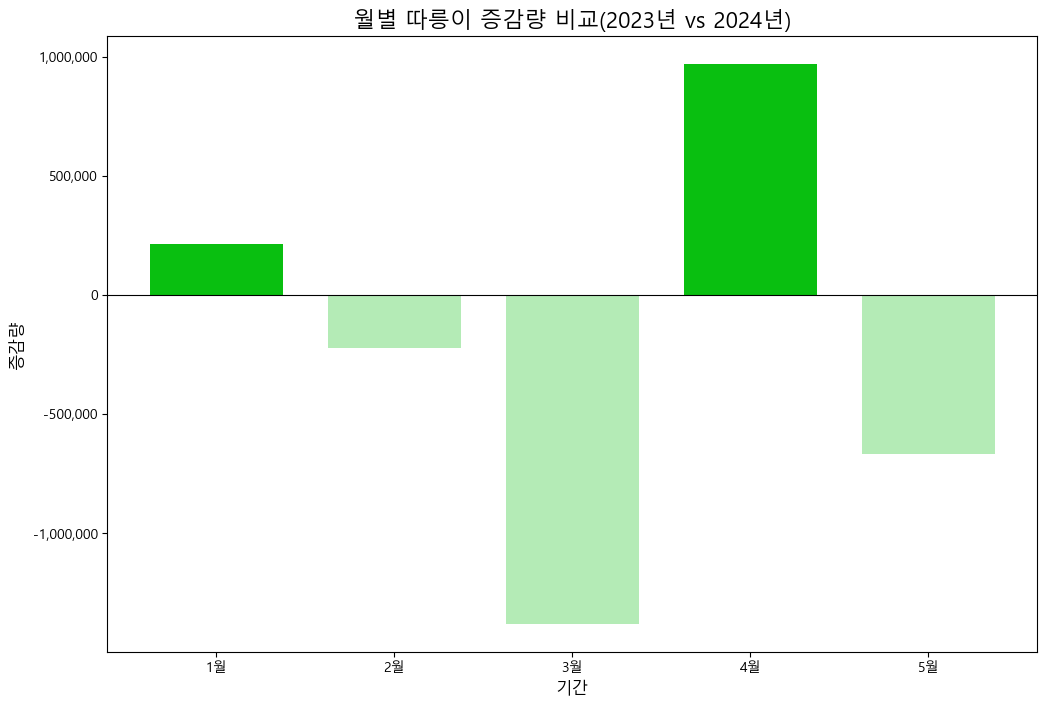

In [40]:
fig, ax = plt.subplots(figsize=(12, 8))

colors = ["#09bf10" if x > 0 else '#B4EBB6' for x in sbike_monthly_total["증감량"]]

plt.bar(sbike_monthly_total.index, sbike_monthly_total["증감량"], color=colors, width=0.75)

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

ax.axhline(y=0, color='black', linestyle='-', linewidth=0.8)

plt.xlabel("기간", fontsize = 12)
plt.ylabel("증감량", fontsize = 12)
plt.title("월별 따릉이 증감량 비교(2023년 vs 2024년)", fontsize = 16)

plt.show()

## 구별 따릉이 대여소 대수

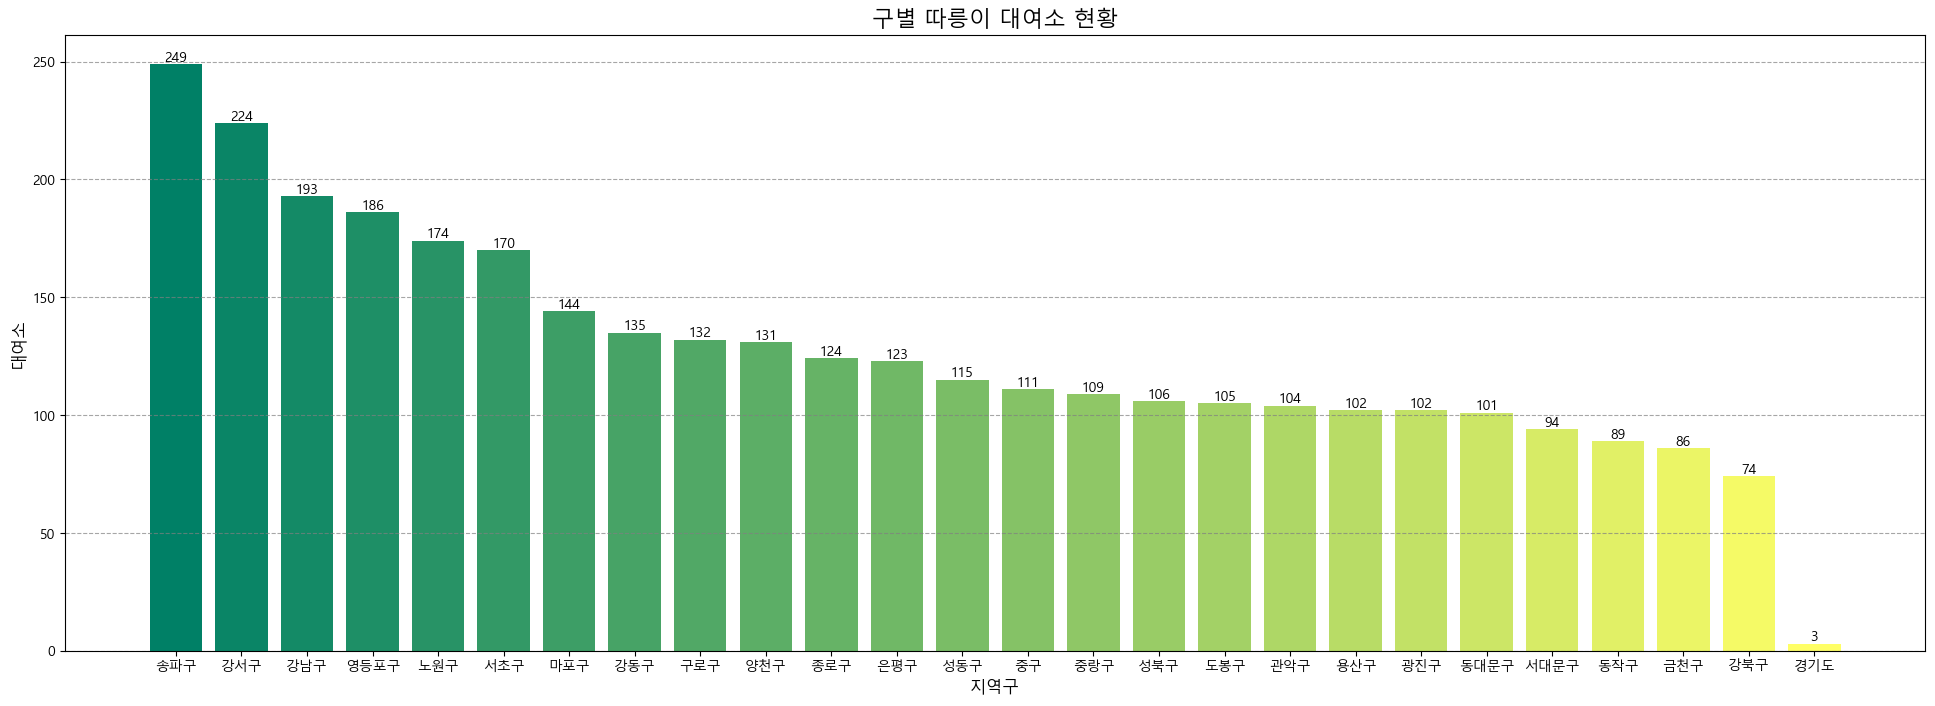

In [158]:
colors = cm.summer(np.linspace(0, 1, len(sbike_count.index)))

fig, ax = plt.subplots(figsize=(24, 8))

bars = ax.bar(sbike_count.index, sbike_count["대여소_ID"], color=colors)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height,
             str(height), ha='center', va='bottom')

plt.xlabel("지역구", fontsize = 12)
plt.ylabel("대여소", fontsize = 12)
plt.title("행정구별 따릉이 대여소 현황", fontsize = 16)

plt.grid(axis='y', linestyle='--', alpha=0.7, color="gray")

plt.show()

## 지하철 사용량 비교

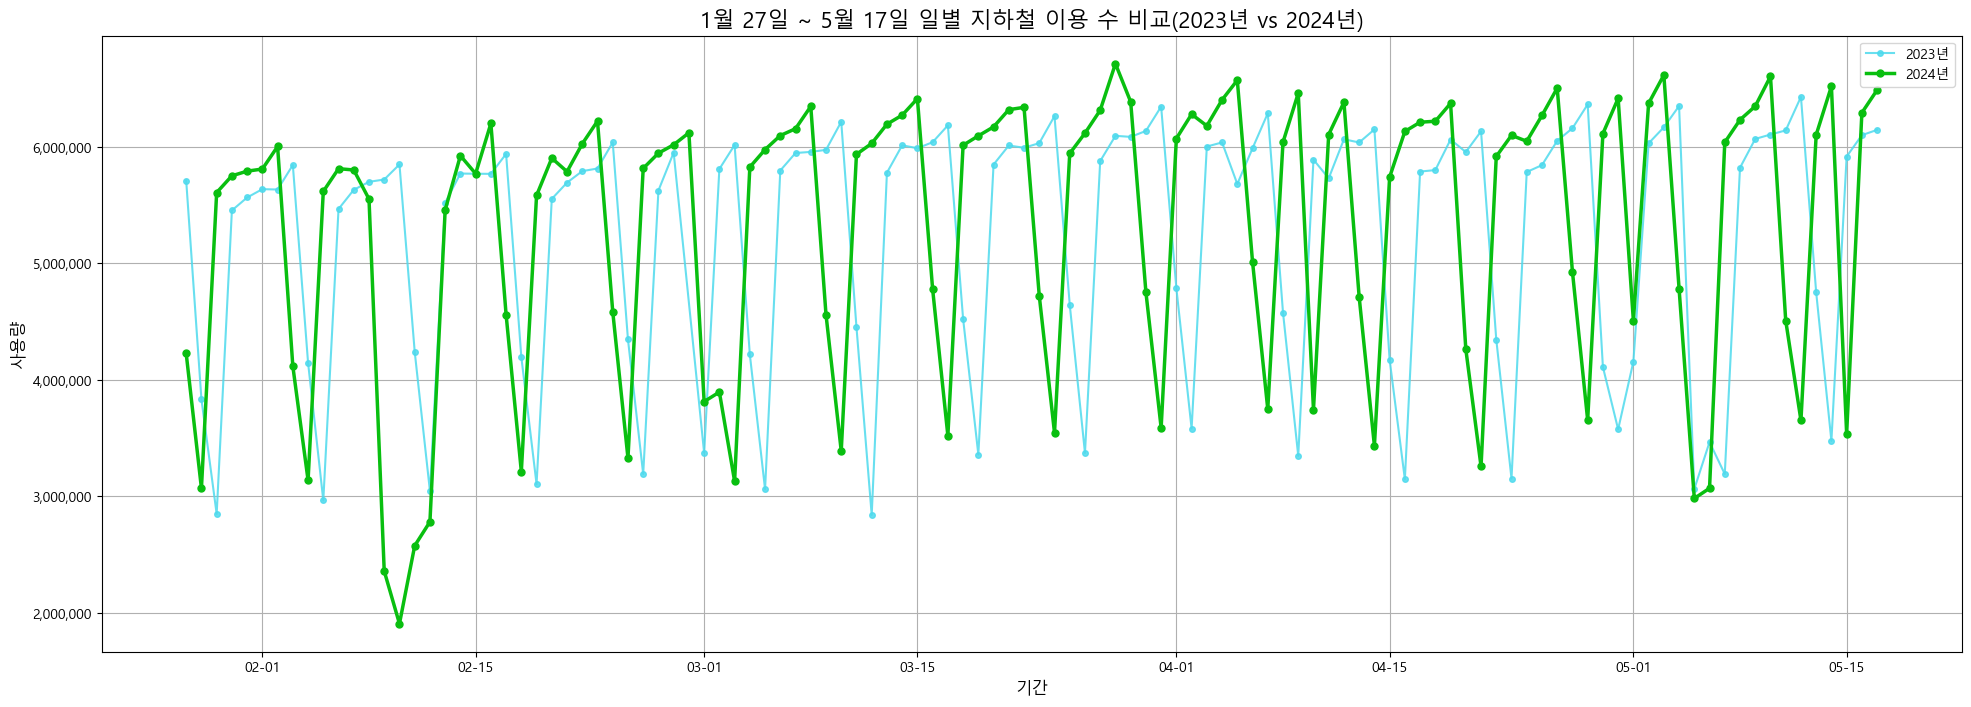

In [166]:
fig, ax = plt.subplots(figsize=(24, 8))

ax.plot(subway_2023_daily_plot.index, subway_2023_daily_plot["승차총승객수"], label = "2023년", marker="o", markersize="4", color="#4EDAED", alpha=0.85)

ax.plot(subway_2024_daily.index, subway_2024_daily["승차총승객수"], label = "2024년", marker="o", markersize="5", linewidth=2.5, color="#09bf10")

date_format = mdates.DateFormatter('%m-%d')
ax.xaxis.set_major_formatter(date_format)

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

plt.xlabel("기간", fontsize = 12)
plt.ylabel("사용량", fontsize = 12)
plt.title("1월 27일 ~ 5월 17일 일별 지하철 이용 수 비교(2023년 vs 2024년)", fontsize = 16)

plt.grid()
plt.legend()

plt.show()

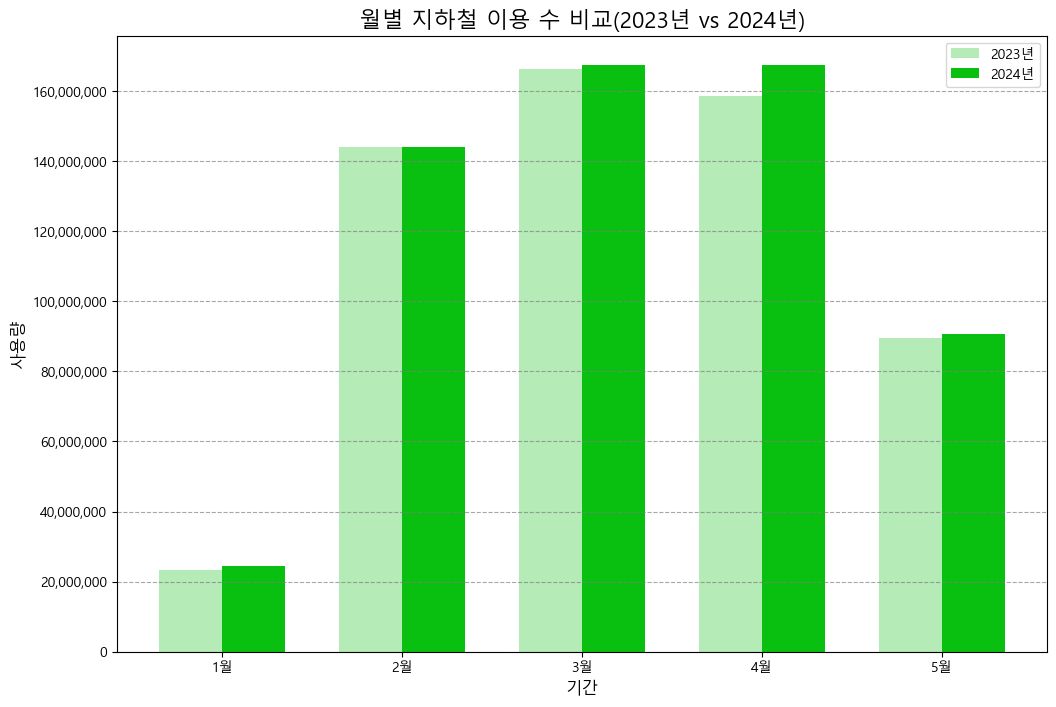

In [169]:
fig, ax = plt.subplots(figsize=(12, 8))

x_labels = ['1월', '2월', '3월', '4월', '5월']
x = np.arange(len(x_labels))

width = 0.35

ax.bar(x - width/2, subway_2023_monthly["승차총승객수"], width, label = "2023년", color="#09bf10", alpha=0.3)
ax.bar(x + width/2, subway_2024_monthly["승차총승객수"], width, label = "2024년", color="#09bf10")

ax.set_xticks(x)
ax.set_xticklabels(x_labels)

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

plt.xlabel("기간", fontsize = 12)
plt.ylabel("사용량", fontsize = 12)
plt.title("월별 지하철 이용 수 비교(2023년 vs 2024년)", fontsize = 16)

plt.grid(axis='y', linestyle='--', alpha=0.7, color="gray")
plt.legend()

plt.show()

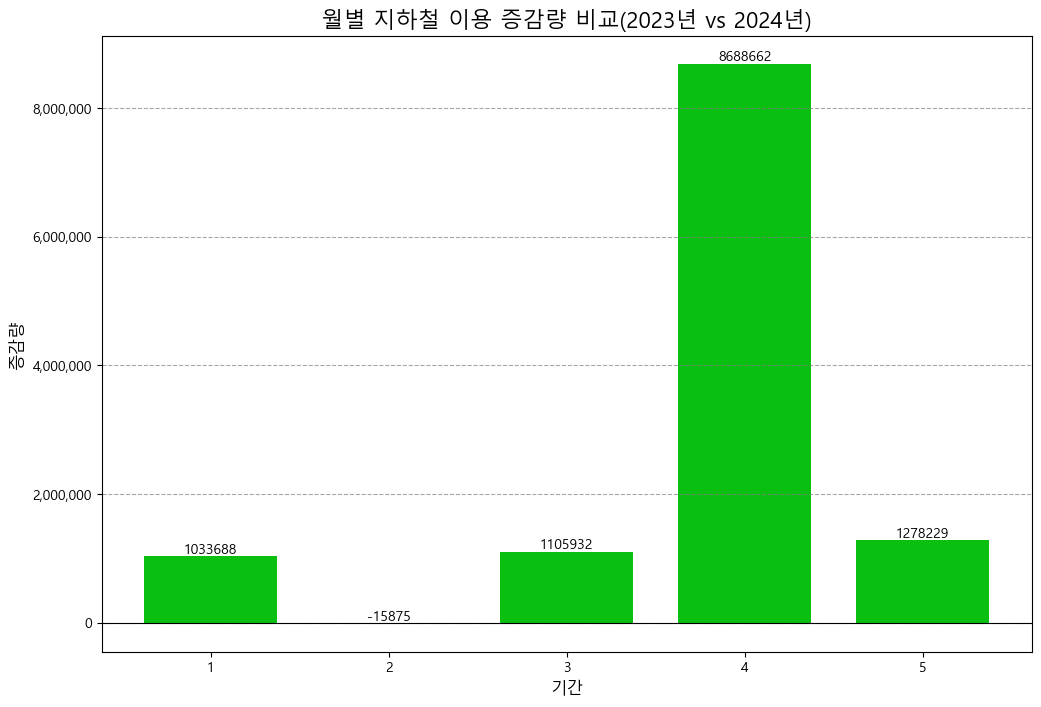

In [36]:
fig, ax = plt.subplots(figsize=(12, 8))

colors = ["#09bf10" if x > 0 else '#B4EBB6' for x in subway_monthly_total["증감량"]]

bars = plt.bar(subway_monthly_total.index, subway_monthly_total["증감량"], color=colors, width=0.75)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height,
             str(height), ha='center', va='bottom')

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

ax.axhline(y=0, color='black', linestyle='-', linewidth=0.8)
plt.grid(axis='y', linestyle='--', alpha=0.7, color="gray")

plt.xlabel("기간", fontsize = 12)
plt.ylabel("증감량", fontsize = 12)
plt.title("월별 지하철 이용 증감량 비교(2023년 vs 2024년)", fontsize = 16)

plt.show()

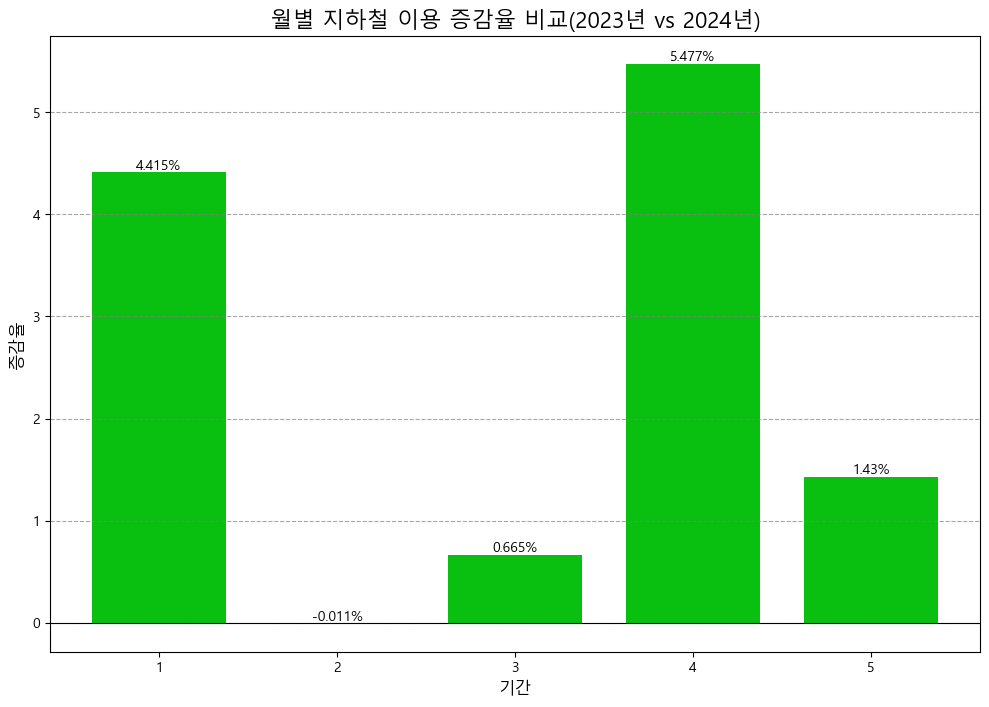

In [39]:
fig, ax = plt.subplots(figsize=(12, 8))

colors = ["#09bf10" if x > 0 else '#B4EBB6' for x in subway_monthly_total["증감율"]]

bars = plt.bar(subway_monthly_total.index, subway_monthly_total["증감율"], color=colors, width=0.75)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height,
             str(round(height, 3)) + "%", ha='center', va='bottom')

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

ax.axhline(y=0, color='black', linestyle='-', linewidth=0.8)
plt.grid(axis='y', linestyle='--', alpha=0.7, color="gray")

plt.xlabel("기간", fontsize = 12)
plt.ylabel("증감율", fontsize = 12)
plt.title("월별 지하철 이용 증감율 비교(2023년 vs 2024년)", fontsize = 16)

plt.show()

## 버스 사용량 비교

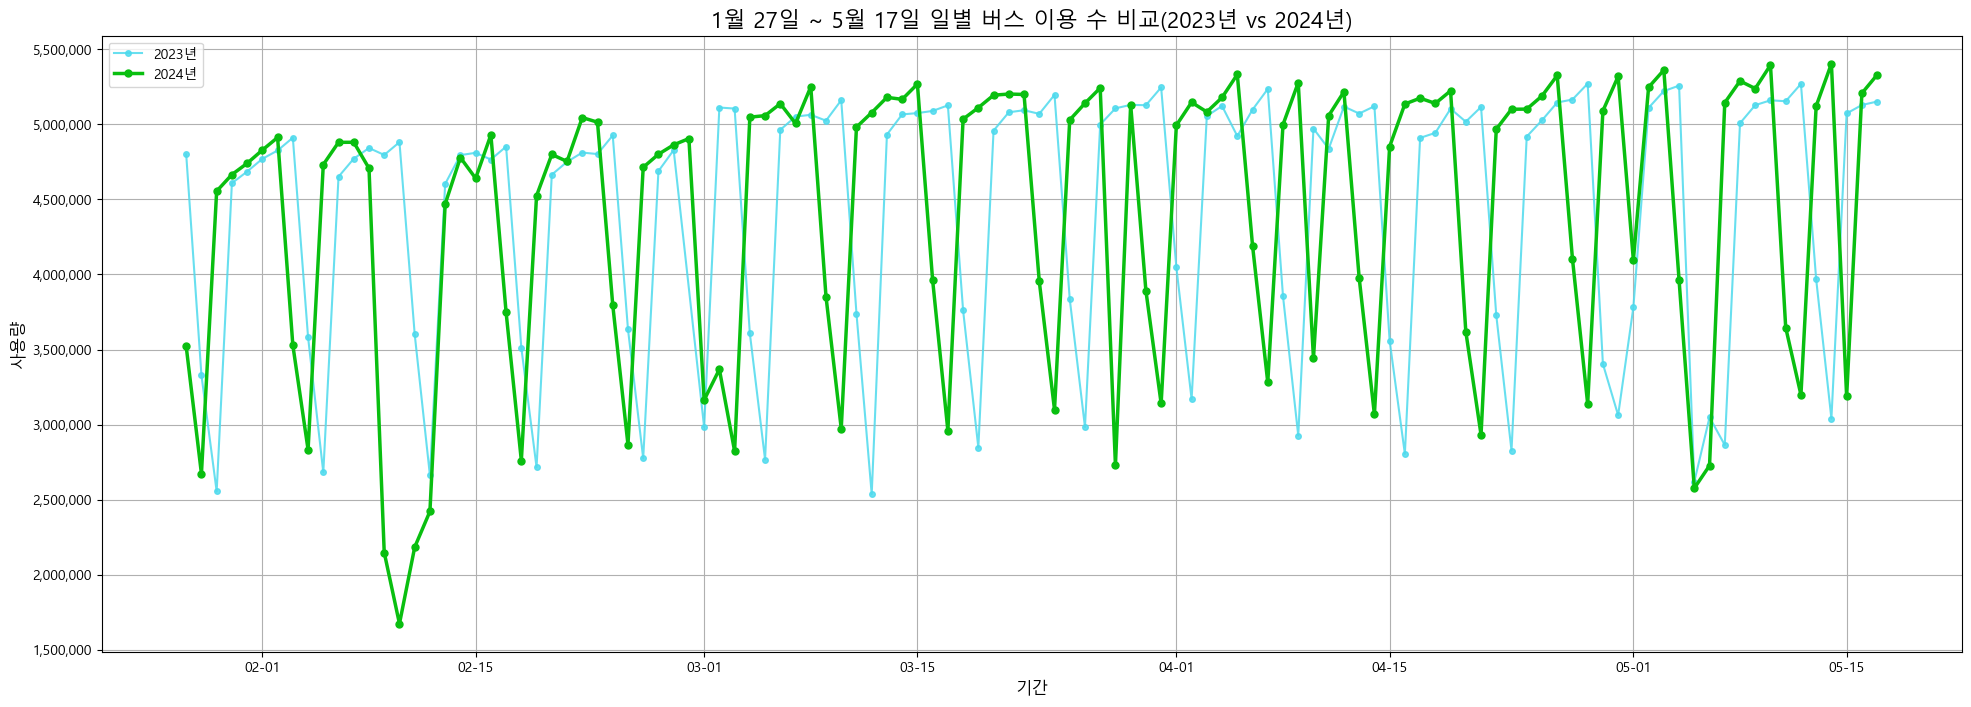

In [15]:
fig, ax = plt.subplots(figsize=(24, 8))

ax.plot(bus_2023_daily_plot.index, bus_2023_daily_plot["승차총승객수"], label = "2023년", marker="o", markersize="4", color="#4EDAED", alpha=0.85)

ax.plot(bus_2024_daily.index, bus_2024_daily["승차총승객수"], label = "2024년", marker="o", markersize="5", linewidth=2.5, color="#09bf10")

date_format = mdates.DateFormatter('%m-%d')
ax.xaxis.set_major_formatter(date_format)

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

plt.xlabel("기간", fontsize = 12)
plt.ylabel("사용량", fontsize = 12)
plt.title("1월 27일 ~ 5월 17일 일별 버스 이용 수 비교(2023년 vs 2024년)", fontsize = 16)

plt.grid()
plt.legend()

plt.show()

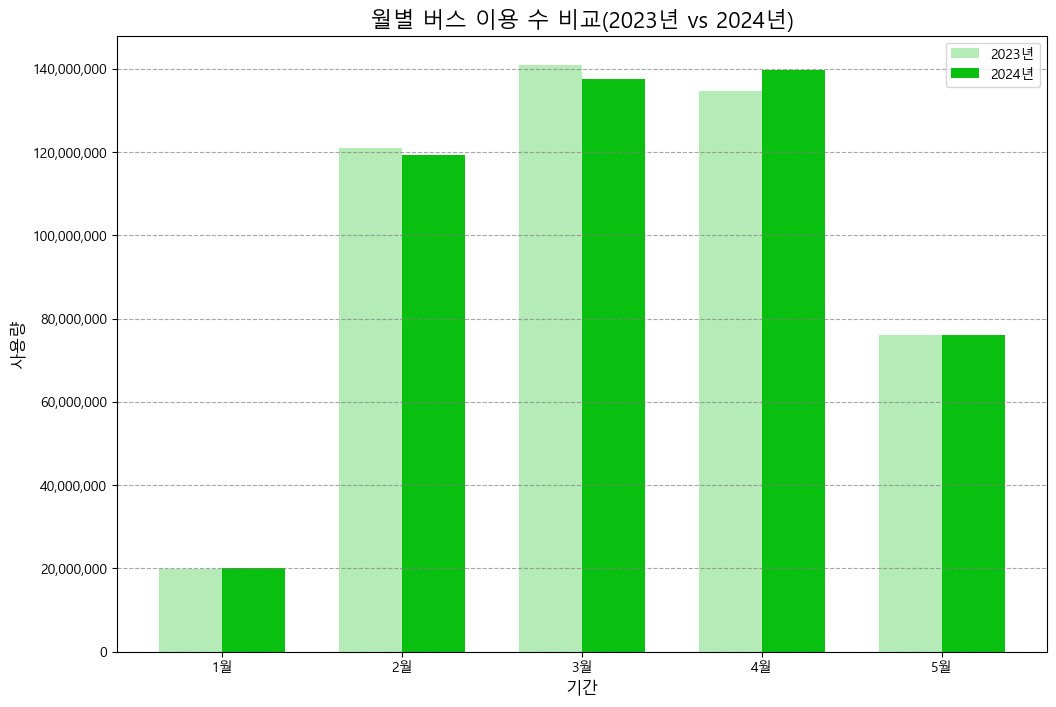

In [16]:
fig, ax = plt.subplots(figsize=(12, 8))

x_labels = ['1월', '2월', '3월', '4월', '5월']
x = np.arange(len(x_labels))

width = 0.35

ax.bar(x - width/2, bus_2023_monthly["승차총승객수"], width, label = "2023년", color="#09bf10", alpha=0.3)
ax.bar(x + width/2, bus_2024_monthly["승차총승객수"], width, label = "2024년", color="#09bf10")

ax.set_xticks(x)
ax.set_xticklabels(x_labels)

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

plt.xlabel("기간", fontsize = 12)
plt.ylabel("사용량", fontsize = 12)
plt.title("월별 버스 이용 수 비교(2023년 vs 2024년)", fontsize = 16)

plt.grid(axis='y', linestyle='--', alpha=0.7, color="gray")
plt.legend()

plt.show()

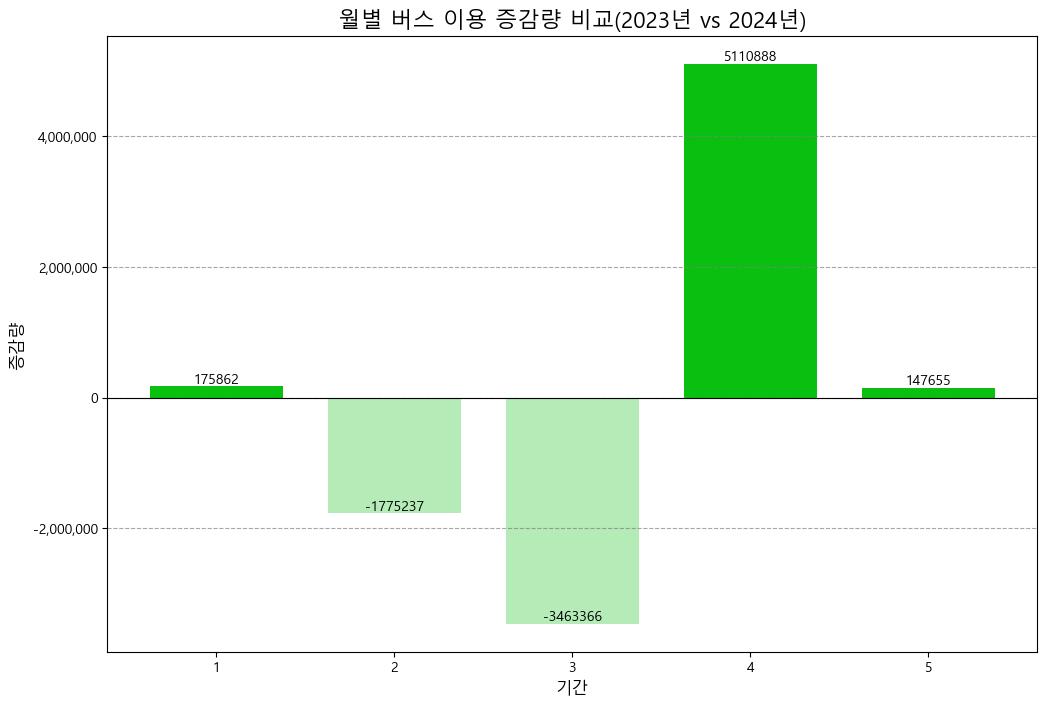

In [38]:
fig, ax = plt.subplots(figsize=(12, 8))

colors = ["#09bf10" if x > 0 else '#B4EBB6' for x in bus_monthly_total["증감량"]]

bars = plt.bar(bus_monthly_total.index, bus_monthly_total["증감량"], color=colors, width=0.75)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height,
             str(height), ha='center', va='bottom')

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

ax.axhline(y=0, color='black', linestyle='-', linewidth=0.8)
plt.grid(axis='y', linestyle='--', alpha=0.7, color="gray")

plt.xlabel("기간", fontsize = 12)
plt.ylabel("증감량", fontsize = 12)
plt.title("월별 버스 이용 증감량 비교(2023년 vs 2024년)", fontsize = 16)

plt.show()

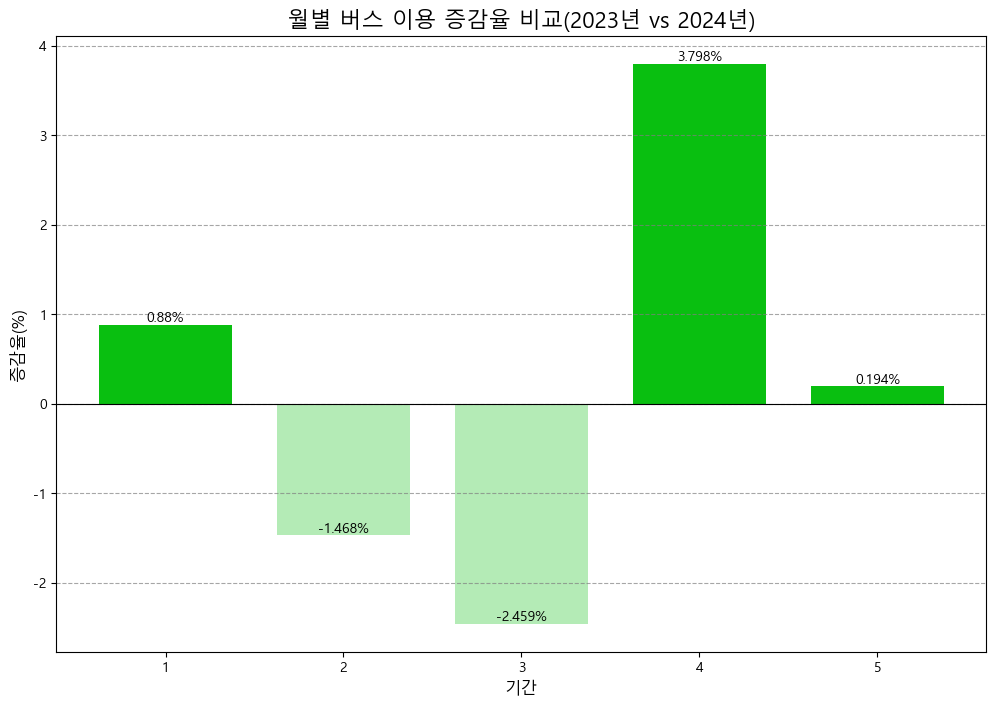

In [41]:
fig, ax = plt.subplots(figsize=(12, 8))

colors = ["#09bf10" if x > 0 else '#B4EBB6' for x in bus_monthly_total["증감율"]]

bars = plt.bar(bus_monthly_total.index, bus_monthly_total["증감율"], color=colors, width=0.75)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height,
             str(round(height, 3)) + "%", ha='center', va='bottom')

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

ax.axhline(y=0, color='black', linestyle='-', linewidth=0.8)
plt.grid(axis='y', linestyle='--', alpha=0.7, color="gray")

plt.xlabel("기간", fontsize = 12)
plt.ylabel("증감율(%)", fontsize = 12)
plt.title("월별 버스 이용 증감율 비교(2023년 vs 2024년)", fontsize = 16)

plt.show()

## 행정구별 지하철 역 개수

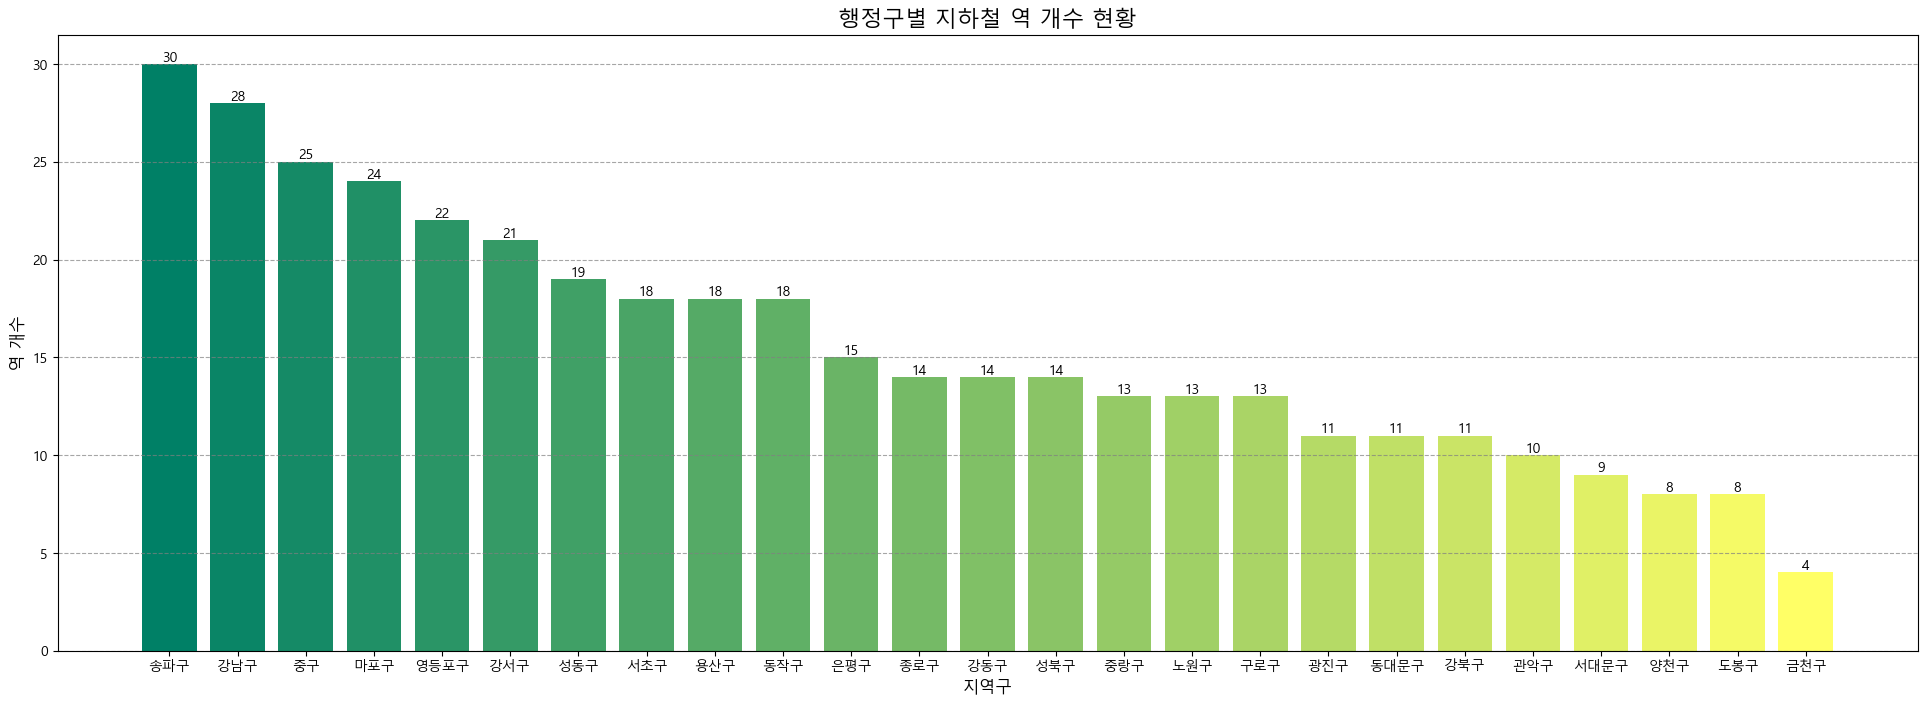

In [103]:
colors = cm.summer(np.linspace(0, 1, len(subway_count.index)))

fig, ax = plt.subplots(figsize=(24, 8))

bars = ax.bar(subway_count.index, subway_count["역한글명칭"], color=colors)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height,
             str(height), ha='center', va='bottom')

plt.xlabel("지역구", fontsize = 12)
plt.ylabel("역 개수", fontsize = 12)
plt.title("행정구별 지하철 역 개수 현황", fontsize = 16)

plt.grid(axis='y', linestyle='--', alpha=0.7, color="gray")

plt.show()

## 행정구별 버스정류장 개수

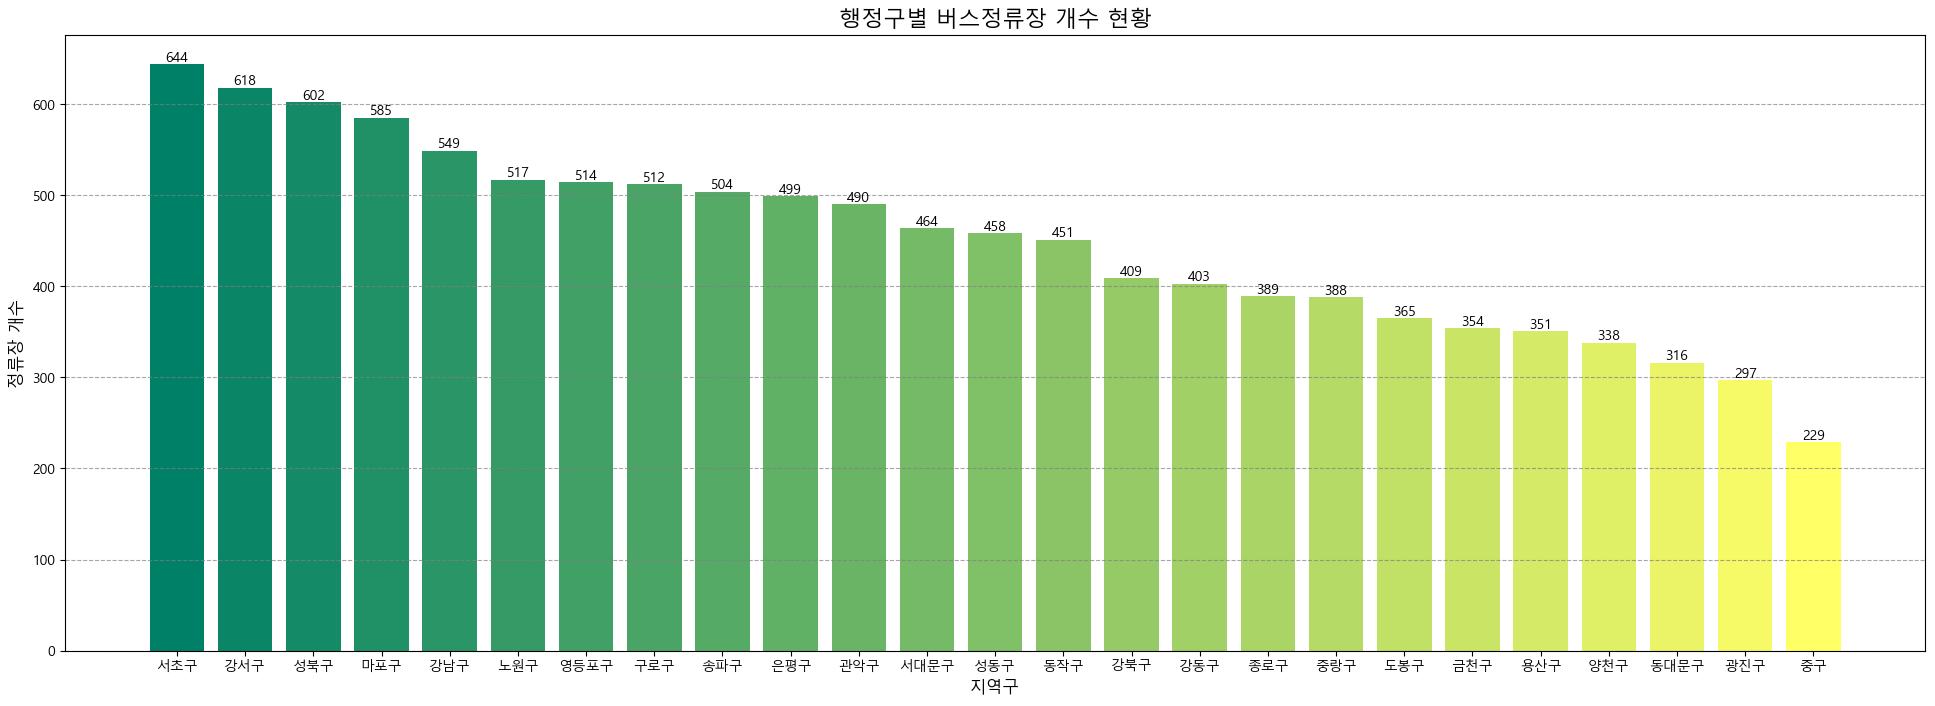

In [105]:
colors = cm.summer(np.linspace(0, 1, len(bus_location.index)))

fig, ax = plt.subplots(figsize=(24, 8))

bars = ax.bar(bus_location.index, bus_location["정류소명"], color=colors)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height,
             str(height), ha='center', va='bottom')

plt.xlabel("지역구", fontsize = 12)
plt.ylabel("정류장 개수", fontsize = 12)
plt.title("행정구별 버스정류장 개수 현황", fontsize = 16)

plt.grid(axis='y', linestyle='--', alpha=0.7, color="gray")

plt.show()

## 행정구별 따릉이 사용량

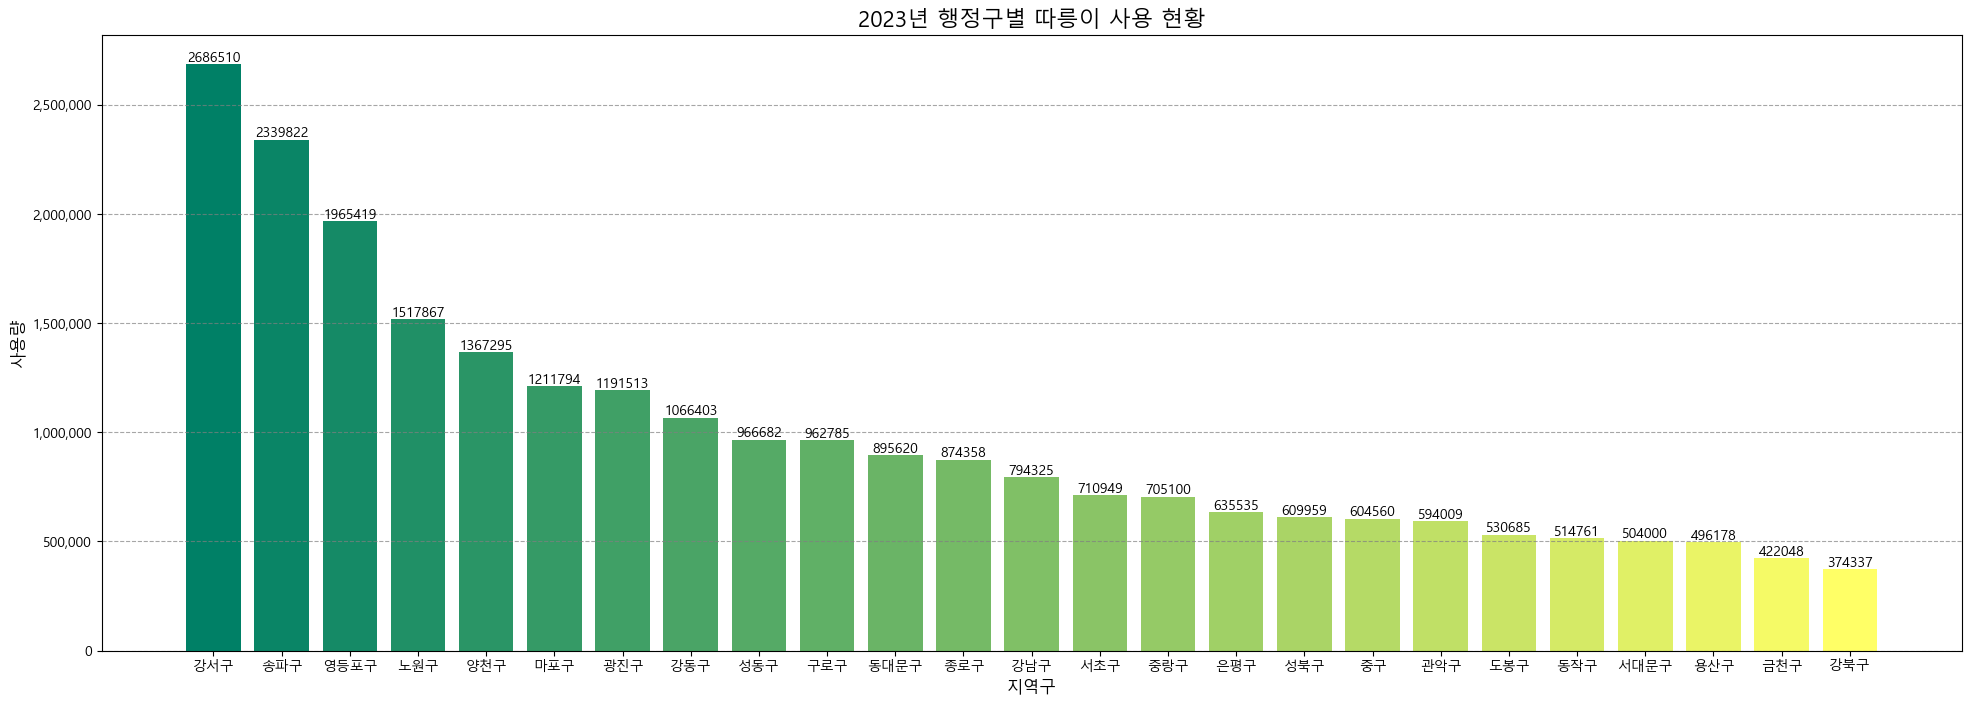

In [314]:
colors = cm.summer(np.linspace(0, 1, len(subway_count.index)))

fig, ax = plt.subplots(figsize=(24, 8))

gu_total = gu_total.sort_values("2023년", ascending=False)

bars = ax.bar(gu_total.index, gu_total["2023년"], color=colors)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height,
             str(height), ha='center', va='bottom')

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
    
plt.xlabel("지역구", fontsize = 12)
plt.ylabel("사용량", fontsize = 12)
plt.title("2023년 행정구별 따릉이 사용 현황", fontsize = 16)

plt.grid(axis='y', linestyle='--', alpha=0.7, color="gray")

plt.show()

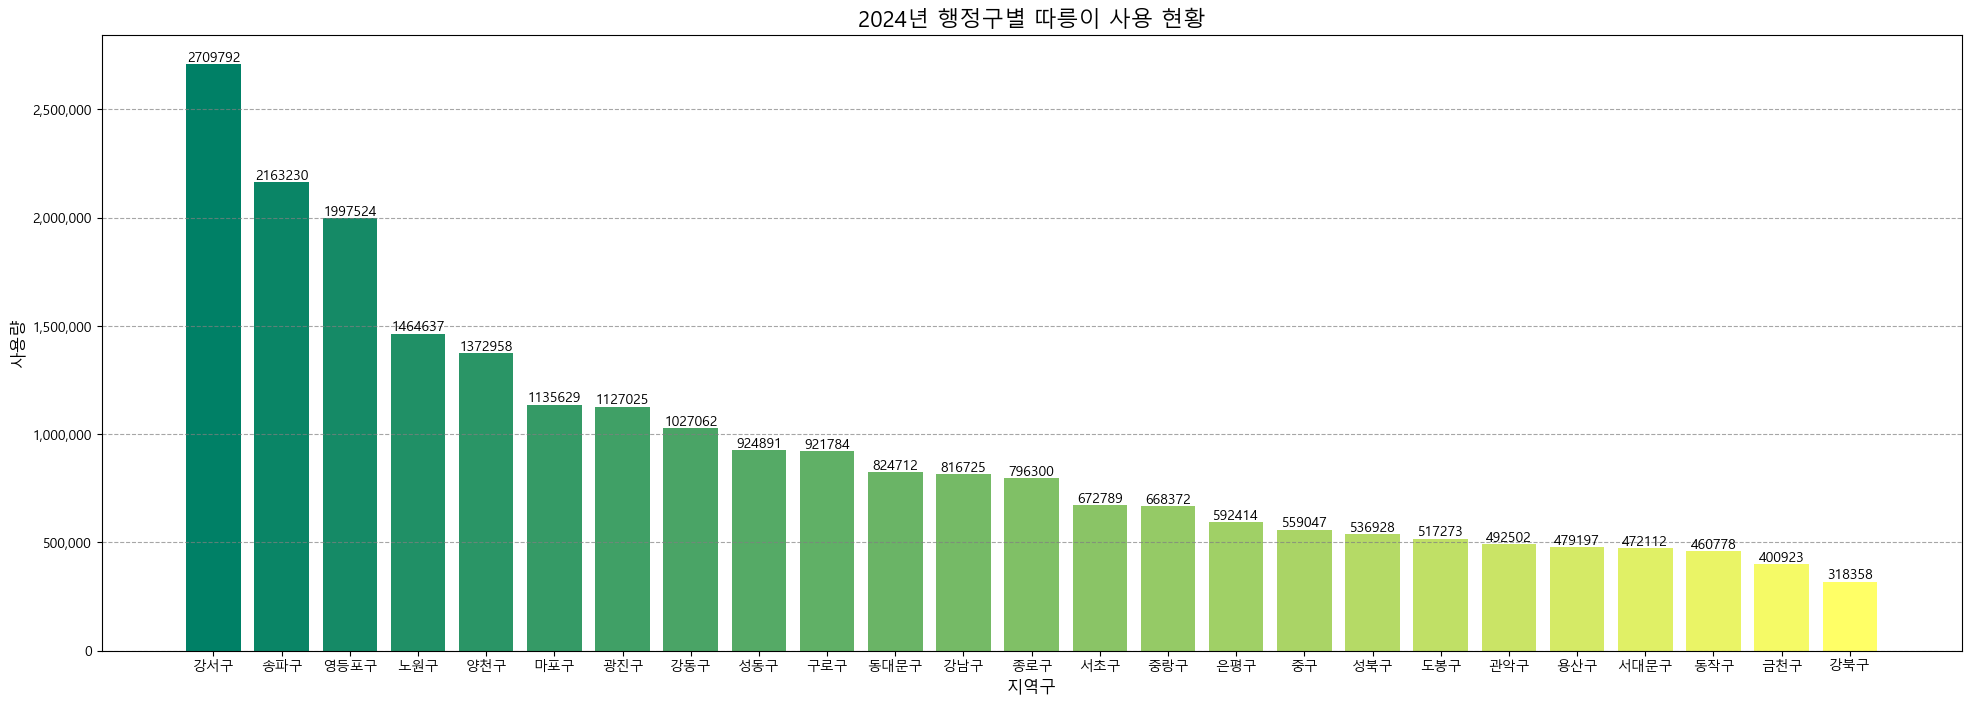

In [315]:
colors = cm.summer(np.linspace(0, 1, len(subway_count.index)))

fig, ax = plt.subplots(figsize=(24, 8))

gu_total = gu_total.sort_values("2024년", ascending=False)

bars = ax.bar(gu_total.index, gu_total["2024년"], color=colors)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height,
             str(height), ha='center', va='bottom')

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
    
plt.xlabel("지역구", fontsize = 12)
plt.ylabel("사용량", fontsize = 12)
plt.title("2024년 행정구별 따릉이 사용 현황", fontsize = 16)

plt.grid(axis='y', linestyle='--', alpha=0.7, color="gray")

plt.show()

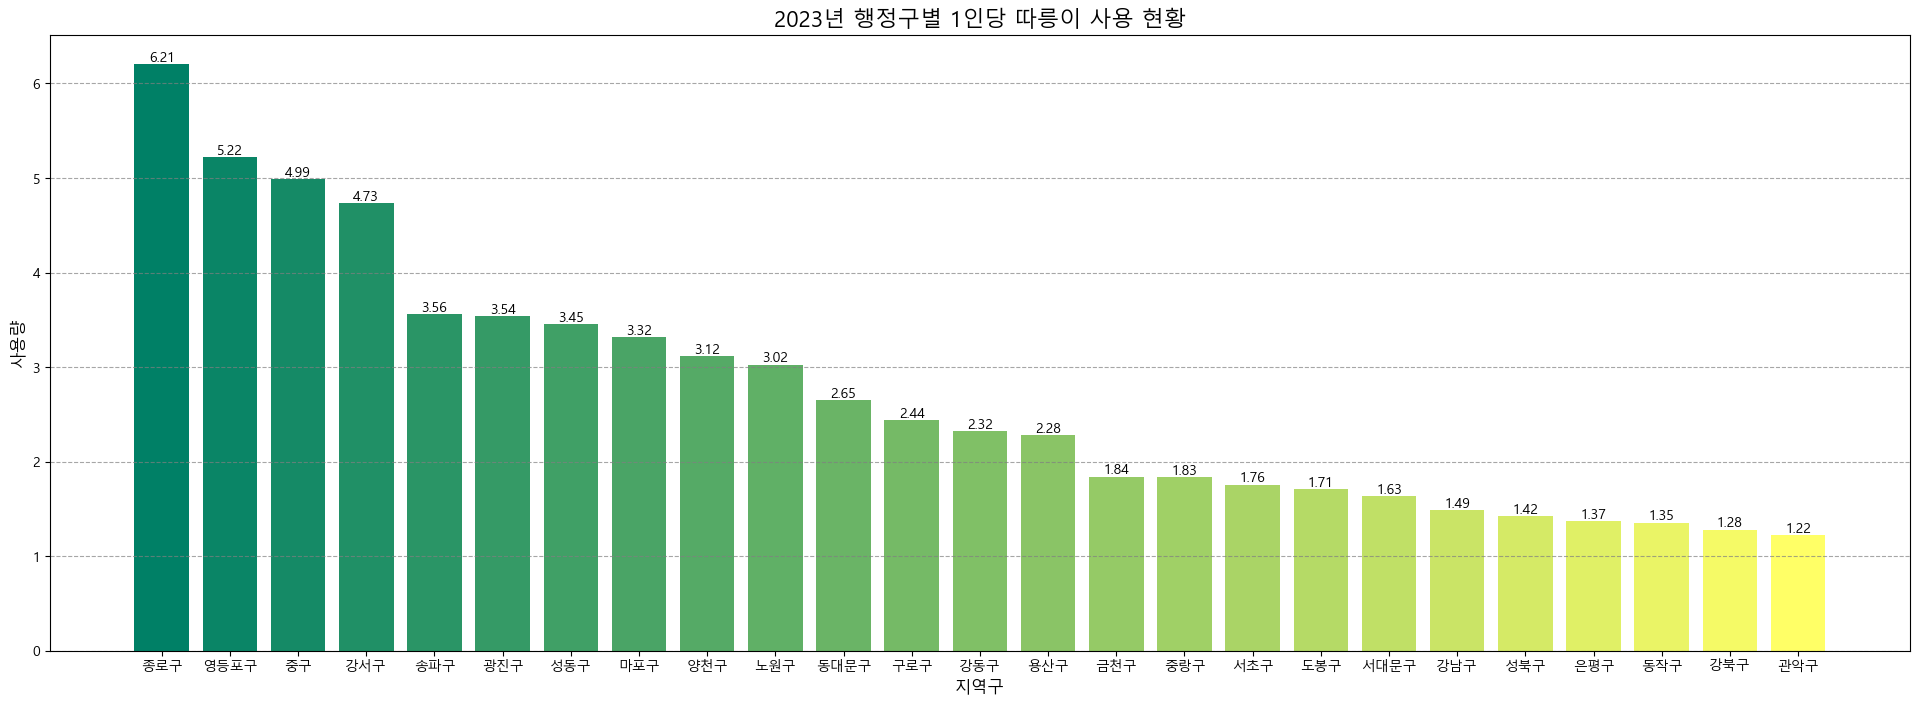

In [319]:
colors = cm.summer(np.linspace(0, 1, len(subway_count.index)))

fig, ax = plt.subplots(figsize=(24, 8))

gu_total = gu_total.sort_values("2023년 1인당 따릉이 사용량", ascending=False)

bars = ax.bar(gu_total.index, gu_total["2023년 1인당 따릉이 사용량"], color=colors)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height,
             str(round(height, 2)), ha='center', va='bottom')

plt.xlabel("지역구", fontsize = 12)
plt.ylabel("사용량", fontsize = 12)
plt.title("2023년 행정구별 1인당 따릉이 사용 현황", fontsize = 16)

plt.grid(axis='y', linestyle='--', alpha=0.7, color="gray")

plt.show()

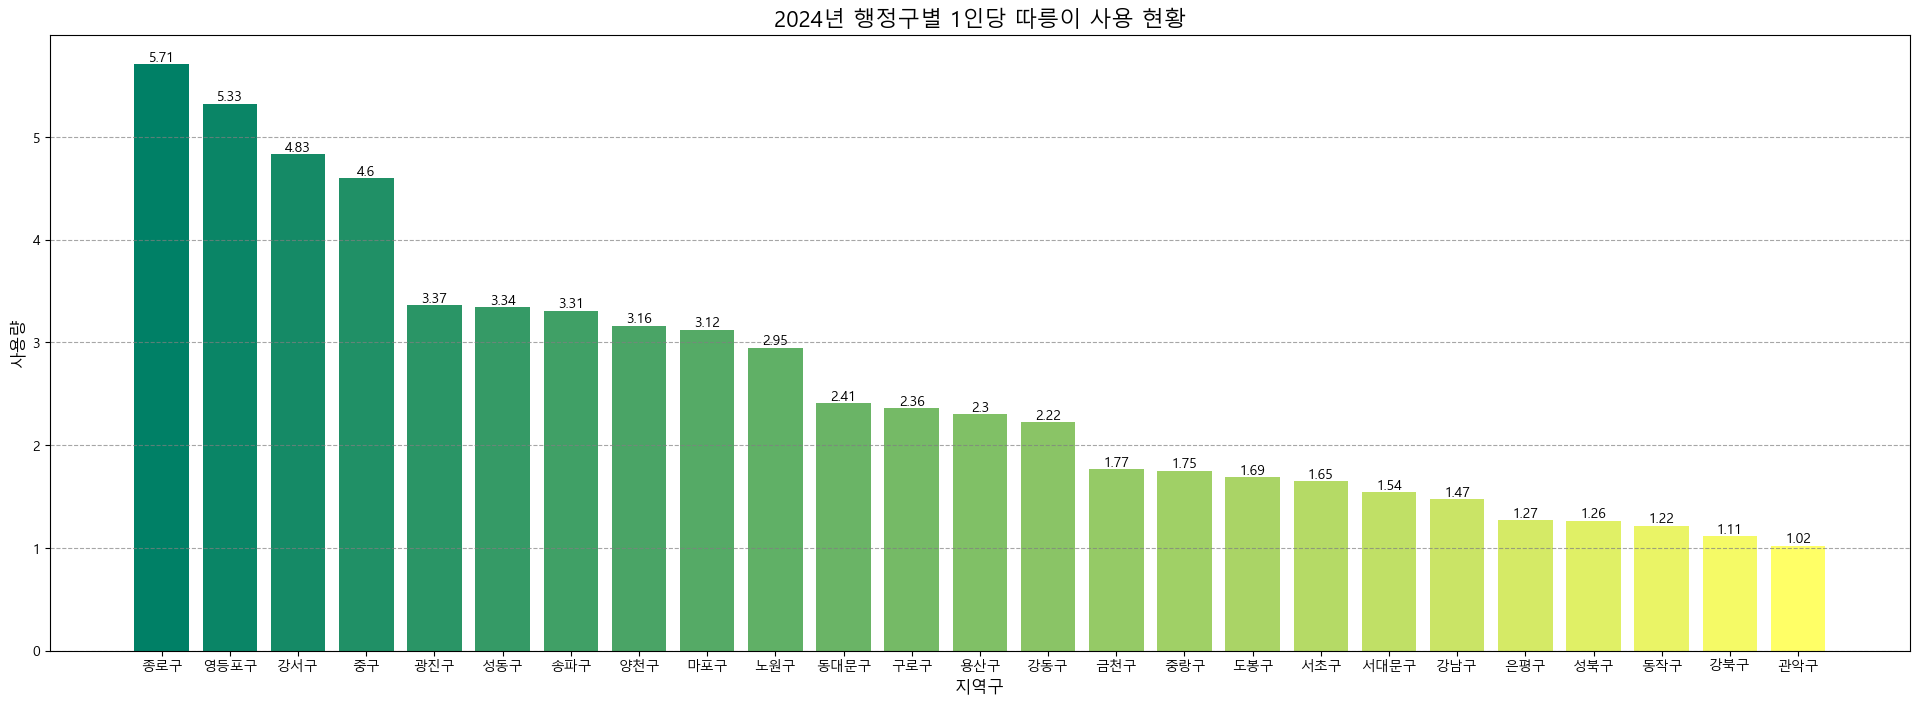

In [320]:
colors = cm.summer(np.linspace(0, 1, len(subway_count.index)))

fig, ax = plt.subplots(figsize=(24, 8))

gu_total = gu_total.sort_values("2024년 1인당 따릉이 사용량", ascending=False)

bars = ax.bar(gu_total.index, gu_total["2024년 1인당 따릉이 사용량"], color=colors)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height,
             str(round(height, 2)), ha='center', va='bottom')

plt.xlabel("지역구", fontsize = 12)
plt.ylabel("사용량", fontsize = 12)
plt.title("2024년 행정구별 1인당 따릉이 사용 현황", fontsize = 16)

plt.grid(axis='y', linestyle='--', alpha=0.7, color="gray")

plt.show()